In [3]:
"""
Aprendizado Supervisionado

O algoritmo aprende a partir de um conjunto de dados rotulado, 
ou seja, cada exemplo de treinamento é associado a um rótulo. 

O objetivo é aprender um mapeamento dos dados de entrada para 
os rótulos de saída.

Vamos considerar algumas características comuns que frequentemente 
diferenciam um e-mail de spam de um e-mail legítimo:

    - Número de palavras: A quantidade de palavras no e-mail.
    
    - Contém a palavra 'grátis': Se o e-mail contém a 
        palavra "grátis" (1 para 'Sim', 0 para 'Não').
    
    - Contém a palavra 'oferta': Se o e-mail contém a palavra 
        "oferta" (1 para 'Sim', 0 para 'Não').
        
    - Links externos: O número de links externos no e-mail.

A etiqueta ainda será É Spam (1 para 'Sim', 0 para 'Não').
"""

# Importa a classe GaussianNB do módulo sklearn.naive_bayes
# Esta classe é usada para implementar o algoritmo Naive Bayes.
from sklearn.naive_bayes import GaussianNB

# Importa a biblioteca pandas para manipulação e análise de dados.
import pandas as pd


# Define uma função chamada 'extrair_caracteristicas' que aceita um argumento 'email_texto'.
# Essa função é responsável por extrair várias características do texto de um e-mail.
def extrair_caracteristicas(email_texto):
    
    # Conta o número de palavras no texto do e-mail.
    # O método 'split()' divide o texto em uma lista de palavras e 
    # 'len()' conta o número de elementos na lista.
    numero_palavras = len(email_texto.split())
    
    
    # Verifica se a palavra "grátis" está presente no texto do e-mail.
    # A função 'lower()' é usada para tornar a busca insensível a maiúsculas e minúsculas.
    # Se a palavra "grátis" estiver presente, 'contem_gratis' será 1, caso contrário, será 0.
    contem_gratis = 1 if "grátis" in email_texto.lower() else 0
    
    
    # Verifica se a palavra "oferta" está presente no texto do e-mail.
    # A função 'lower()' é usada para tornar a busca insensível a maiúsculas e minúsculas.
    # Se a palavra "oferta" estiver presente, 'contem_oferta' será 1, caso contrário, será 0.
    contem_oferta = 1 if "oferta" in email_texto.lower() else 0
    
    
    # Conta a quantidade de ocorrências da string "http" no texto do e-mail.
    # Isso serve como uma aproximação para contar o número de links externos no e-mail.
    # A função 'lower()' é usada para tornar a busca insensível a maiúsculas e minúsculas.
    qtd_links = email_texto.lower().count("http")
    
    
    # Retorna uma lista com as características extraídas:
    # número de palavras, presença da palavra "grátis", presença da palavra "oferta" e quantidade de links.
    return [numero_palavras, contem_gratis, contem_oferta, qtd_links]


# Dados para treinamento do modelo
# 0 - Não é SPAM
# 1 - É SPAM

#Não é SPAM
# 100 palavras
# 0 - Grátis
# 0 - Oferta
# 1 - Links
dados_treino = {
    'Numero_Palavras': [90, 150, 50, 100, 50, 75],
    'Contem_Gratis': [0, 1, 0, 1, 0, 1],
    'Contem_Oferta': [0, 1, 1, 0, 0, 1],
    'Qtd_Links': [1, 3, 2, 4, 0, 5],
    'Eh_Spam': [0, 1, 1, 1, 0, 1]
}

# Dados de treino são colocados no DataFrame 'df_treino'
# Esses dados são usados para treinar o modelo Naive Bayes
df_treino = pd.DataFrame(dados_treino)

#display(df_treino)
print(df_treino)


# Separa as colunas de características e a coluna de 
# etiquetas (labels) em duas variáveis diferentes, X_treino e y_treino.
# X_treino contém as características que serão usadas para treinar o modelo.
# y_treino contém as etiquetas que indicam se cada linha é spam (1) ou não spam (0).
X_treino = df_treino[['Numero_Palavras', 'Contem_Gratis', 'Contem_Oferta', 'Qtd_Links']]
y_treino = df_treino['Eh_Spam']


# Cria uma instância da classe GaussianNB, que implementa o algoritmo Naive Bayes
modelo_nb = GaussianNB()

# Treina o modelo Naive Bayes usando os dados em X_treino para as
# características e y_treino para as etiquetas.
# O método 'fit' ajusta o modelo aos dados fornecidos.
modelo_nb.fit(X_treino, y_treino)


#email_exemplo = "Olá, este é um email para te desejar uma boa noite!"
email_exemplo = "Olá, compre nosso produto amostra grátis e está em Oferta hoje, aproveite nossa promoção pelo link https://www.google.com/  e link https://www.google.com/"

# Simula um e-mail inserido pelo usuário para teste.
# Neste caso, é um e-mail simples que deseja uma "boa noite".
# email_exemplo = "Olá, este é um email para te desejar uma boa noite!."

# Utiliza a função 'extrair_caracteristicas' para obter as
# características deste e-mail de exemplo.
caracteristicas = extrair_caracteristicas(email_exemplo)


# Exibe as características extraídas na tela.
print(f"\nCaracteristicas extraídas")
print(f"Número de Palavras: {caracteristicas[0]}")
print(f"Contém 'Grátis': {caracteristicas[1]}")
print(f"Contém 'Oferta': {caracteristicas[2]}")
print(f"Quantidade de Links': {caracteristicas[3]}")

# Prepara as características para serem usadas no modelo, colocando-as em um DataFrame.
caracteristicas_df = pd.DataFrame([caracteristicas], columns=['Numero_Palavras', 'Contem_Gratis', 'Contem_Oferta', 'Qtd_Links'])
    
    
# Realiza a previsão utilizando o modelo treinado.
# O método 'predict' retorna um array com as previsões.
previsao = modelo_nb.predict(caracteristicas_df)

# Exibe o resultado da previsão.
# O valor será 1 se o e-mail for classificado como spam
# e 0 se for classificado como não spam.
if previsao[0] == 1:
    print("O e-mail é considerado SPAM.")
else:
    print("O e-mail é considerado seguro (não é SPAM).")

   Numero_Palavras  Contem_Gratis  Contem_Oferta  Qtd_Links  Eh_Spam
0               90              0              0          1        0
1              150              1              1          3        1
2               50              0              1          2        1
3              100              1              0          4        1
4               50              0              0          0        0
5               75              1              1          5        1

Caracteristicas extraídas
Número de Palavras: 20
Contém 'Grátis': 1
Contém 'Oferta': 1
Quantidade de Links': 2
O e-mail é considerado SPAM.


In [8]:
# Importa as classes Tk, Label, Button, Text, Scrollbar e INSERT do módulo tkinter.
# Essas classes serão usadas para criar a interface gráfica do usuário (GUI).
from tkinter import Tk, Label, Button, Text, Scrollbar, INSERT

# Importa a classe GaussianNB do módulo sklearn.naive_bayes.
# Esta classe é usada para implementar o algoritmo Naive Bayes.
from sklearn.naive_bayes import GaussianNB

# Importa a biblioteca pandas para manipulação e análise de dados.
# Será usada para criar e manipular o DataFrame.
import pandas as pd

# Importa a biblioteca re para trabalhar com expressões regulares.
# Será usada para extrair características específicas dos e-mails.
import re


# Define uma função chamada 'extrair_caracteristicas' que aceita uma variável 'email_texto'.
def extrair_caracteristicas(email_texto):
    
    # Conta o número de palavras no texto do e-mail. 
    # 'split()' divide o texto em uma lista de palavras e
    # 'len()' conta o número de itens na lista.
    numero_palavras = len(email_texto.split())
    
    # Usa expressão regular para verificar se a palavra 'grátis' está no texto do e-mail.
    # 're.search()' retorna um objeto de correspondência se encontrar uma ocorrência.
    # '\b' indica a borda da palavra, garantindo que palavras como 'agráde' não sejam contadas.
    # 're.IGNORECASE' torna a busca insensível a maiúsculas e minúsculas.
    contem_gratis = 1 if re.search(r'\bgrátis\b', email_texto, re.IGNORECASE) else 0
    
    # Similar ao 'contem_gratis', mas verifica a presença da palavra 'oferta'.
    contem_oferta = 1 if re.search(r'\boferta\b', email_texto, re.IGNORECASE) else 0
    
    # Conta o número de URLs no texto do e-mail usando expressão regular.
    # 're.findall()' retorna todas as ocorrências da expressão regular no texto.
    # A expressão regular usada é uma expressão comum para encontrar URLs.
    qtd_links = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_texto))
    
    
    # Retorna uma lista contendo as características extraídas: 
    # número de palavras, presença da palavra 'grátis', presença da
    # palavra 'oferta' e quantidade de links.
    return [numero_palavras, contem_gratis, contem_oferta, qtd_links]

    

# Define uma classe chamada 'App' para criar a interface gráfica do usuário.
class App:
    
    # Método construtor '__init__' que é executado quando uma instância da classe é criada.
    # 'raiz' é o argumento que representa a janela principal da interface gráfica.
    def __init__(self, raiz):
        
        # Atribui o argumento 'raiz' ao atributo 'self.raiz' da classe.
        self.raiz = raiz
        
        # Define o título da janela como "Classificador de SPAM".
        raiz.title("Classificador de SPAM")
        
        # Cria uma caixa de texto onde o usuário pode digitar o e-mail a ser classificado.
        # O texto será ajustado automaticamente ('wrap=word') e a caixa terá dimensões de 50x20.
        self.caixa_texto = Text(raiz, wrap='word', width=50, height=20)
        
        # Adiciona a caixa de texto à janela principal.
        self.caixa_texto.pack()        
        
        # Cria uma barra de rolagem vertical para a caixa de texto.
        self.barra_rolagem = Scrollbar(raiz, command=self.caixa_texto.yview)
        
        # Adiciona a barra de rolagem à direita da janela principal.
        self.barra_rolagem.pack(side='right', fill='y')
                
        # Configura a barra de rolagem para funcionar com a caixa de texto.
        self.caixa_texto.config(yscrollcommand=self.barra_rolagem.set)
        
        
        # Cria um botão chamado "Classificar" que, quando pressionado, chama o método 'classificar_spam'.
        self.botao_classificar = Button(raiz, text="Classificar", command=self.classificar_spam)
        
        # Adiciona o botão à janela principal.
        self.botao_classificar.pack()
        
        
        # Cria um label (rótulo de texto) para exibir as características extraídas do e-mail.
        # Inicialmente, o texto do label está vazio.
        self.label_caracteristicas = Label(raiz, text="", font=("Arial 20"))
        
        # Adiciona o label à janela principal.
        self.label_caracteristicas.pack()
        
        
        # Cria outro label para exibir o resultado da classificação (se é SPAM ou não).
        # Inicialmente, o texto do label está vazio.
        self.label_resultado = Label(raiz, text="", font=("Arial 20"))
        
        # Adiciona o label à janela principal.
        self.label_resultado.pack()
        
        
    # Define uma função de nome 'classificar_spam' dentro da classe App.
    # Essa função será chamada quando o usuário clicar no botão "Classificar".
    def classificar_spam(self):

        # Obtém o conteúdo da caixa de texto, do início ("1.0") ao fim ('end-1c').
        # O conteúdo obtido é armazenado na variável 'email_digitado'.
        email_digitado = self.caixa_texto.get("1.0", 'end-1c')
        
        
        # Chama a função 'extrair_caracteristicas' para obter as características do e-mail.
        # As características são armazenadas na variável 'caracteristicas'.
        caracteristicas = extrair_caracteristicas(email_digitado)

        # Atualiza o conteúdo do Label 'label_caracteristicas' para 
        # mostrar as características extraídas.
        # Utiliza formatação de string para inserir as características no texto.
        self.label_caracteristicas.config(text=f"Características extraídas:\nNúmero de Palavras: {caracteristicas[0]}\nContém 'Grátis': {caracteristicas[1]}\nContém 'Oferta': {caracteristicas[2]}\nQuantidade de Links: {caracteristicas[3]}")
        
        
        # Cria um DataFrame do Pandas para armazenar as características em 
        # um formato que o modelo possa usar.
        # O DataFrame tem colunas nomeadas para corresponder às características.
        caracteristicas_df = pd.DataFrame([caracteristicas], columns=['Numero_Palavras', 'Contem_Gratis', 'Contem_Oferta', 'Qtd_Links'])
    
        # Usa o modelo Naive Bayes (modelo_nb) para fazer a previsão com base nas características.
        # A previsão é armazenada na variável 'previsao'.
        previsao = modelo_nb.predict(caracteristicas_df)

        # Verifica o resultado da previsão para atualizar o Label 'label_resultado'.
        # Se a previsão for 1 (SPAM), atualiza o Label para mostrar que o e-mail é SPAM.
        # Se for 0 (não é SPAM), mostra que o e-mail é seguro.
        if previsao[0] == 1:
            self.label_resultado.config(text="O e-mail é considerado SPAM.")
        else:
            self.label_resultado.config(text="O e-mail é considerado seguro (não é SPAM).")
            
            
# Dados para treinamento do modelo
dados_treino = {
    'Numero_Palavras': [90, 150, 50, 100, 50, 75],
    'Contem_Gratis': [0, 1, 0, 1, 0, 1],
    'Contem_Oferta': [0, 1, 1, 0, 0, 1],
    'Qtd_Links': [1, 3, 2, 4, 0, 5],
    'Eh_Spam': [0, 1, 1, 1, 0, 1]
}


# Converte o dicionário 'dados_treino' em um DataFrame do Pandas.
# Isso é feito para facilitar a manipulação e análise dos dados.
df_treino = pd.DataFrame(dados_treino)

# Separa as colunas de características e a coluna de etiquetas (labels) em duas
# variáveis diferentes, X_treino e y_treino.
# X_treino contém as características que serão usadas para treinar o modelo.
# y_treino contém as etiquetas que indicam se cada linha é spam (1) ou não spam (0).
X_treino = df_treino[['Numero_Palavras', 'Contem_Gratis', 'Contem_Oferta', 'Qtd_Links']]
y_treino = df_treino['Eh_Spam']

# Cria uma instância da classe GaussianNB, que é uma implementação do algoritmo Naive Bayes.
# GaussianNB é importado da biblioteca scikit-learn.
modelo_nb = GaussianNB()

# Treina o modelo Naive Bayes usando os dados em X_treino para as 
# características e y_treino para as etiquetas.
# O método 'fit' ajusta o modelo aos dados fornecidos.
modelo_nb.fit(X_treino, y_treino)


# Inicializa a interface gráfica Tkinter.
# Tk é uma classe do módulo Tkinter que cria uma janela raiz.
raiz = Tk()

# Cria uma instância da classe 'App', que contém todos os
# widgets (caixas de texto, botões, etc.)
# e a lógica para a interface gráfica.
app = App(raiz)

# Entra no loop principal da interface gráfica.
# O método 'mainloop' mantém a janela aberta e responde a eventos do usuário.
raiz.mainloop()


"""
Características do Modelo de E-mail Spam

    Numero_de_Palavras: 500 (Um e-mail muito longo pode ser suspeito)
    Palavra_Gratis: 1 (Contém a palavra "grátis")
    Palavra_Oferta: 1 (Contém a palavra "oferta")
    Links_Externos: 5 (Contém muitos links externos, que podem levar a sites maliciosos)

Texto do E-mail (Modelo)

#-------------------------------------------

Assunto: Oferta Imperdível! Ganhe um iPhone GRÁTIS!

Olá Leonardo,

Você foi selecionado para uma oferta incrível! Clique no link abaixo 
para ganhar um iPhone absolutamente GRÁTIS!

https://www.google.com/

Mas espere, tem mais! Temos também ofertas exclusivas para você!

https://www.google.com/

Não perca essa oportunidade única!

https://www.google.com/

Atenciosamente,
Equipe de Marketing

#-------------------------




Características do Modelo de E-mail Não-Spam

    Numero_de_Palavras: 100 (O e-mail não é muito longo)
    Palavra_Gratis: 0 (Não contém a palavra "grátis")
    Palavra_Oferta: 0 (Não contém a palavra "oferta")
    Links_Externos: 1 (Contém apenas um link externo, que é menos suspeito)

Texto do E-mail (Modelo)


Assunto: Atualização Sobre o Projeto

Olá Cesar,

Espero que esteja tudo bem.

Estou escrevendo para atualizá-lo sobre o status do nosso projeto atual. Fizemos um progresso significativo desde a nossa última reunião e estou ansioso para discutir os detalhes na próxima semana.

Para mais informações, você pode visitar a nossa página de atualizações do projeto:
https://www.google.com/

Agradeço o seu tempo e esforço contínuos neste projeto.

Atenciosamente,



"""
print()

In [10]:
"""
Exercício: Sistema de Recomendação de Filmes com Naive Bayes

Contexto:

Você é um desenvolvedor em uma startup que está trabalhando em um 
aplicativo de streaming de filmes. A empresa quer implementar um sistema
de recomendação de filmes para melhorar a experiência do usuário. Seu
objetivo é criar um sistema de recomendação que aprende com o feedback 
dos usuários.

Requisitos:

    - Utilize o algoritmo Naive Bayes para desenvolver um modelo de 
        recomendação de filmes. O conjunto de dados fornecido no código 
        inclui uma lista de filmes e seus respectivos 
        gêneros (Ficção Científica, Drama, Ação, etc.).

    - Implemente uma interface gráfica usando a biblioteca Tkinter. A interface deve:
        - Mostrar ao usuário um filme e seu gênero.
        - Ter botões "Sim" e "Não" para o usuário indicar se gostou ou
            não do filme exibido.

    - Com base no feedback do usuário, o sistema deve adaptar suas 
        recomendações. Se o usuário gostou de um filme de um determinado 
        gênero, outros filmes desse gênero deverão ser priorizados nas 
        recomendações futuras.

    - Após receber o feedback de 5 filmes, o sistema deve ser capaz de 
        mostrar uma lista de recomendações finais baseada nos gêneros que o 
        usuário mais gostou. Esta lista deve ser exibida em uma nova janela Tkinter.

    - Use uma caixa de mensagem para informar o usuário caso não seja possível
        determinar suas preferências de gênero.
"""

# Importando a biblioteca Tkinter para criar a interface gráfica do usuário.
import tkinter as tk

# Importando a classe messagebox do Tkinter para exibir caixas de diálogo.
from tkinter import messagebox

# Importando a biblioteca random para gerar números aleatórios.
import random

# Importando a biblioteca NumPy para manipulação de arrays e matrizes.
import numpy as np

# Importando o classificador Naive Bayes Multinomial do 
# scikit-learn para aprendizado de máquina.
from sklearn.naive_bayes import MultinomialNB


# Definindo uma função chamada 'codificar_genero' que leva um argumento 'genero'.
# Essa função codifica os gêneros de filmes como números inteiros.
# Por exemplo, se temos gêneros como ['Ação', 'Drama'], 'Ação' seria 
# codificado como 0 e 'Drama' como 1.
def codificar_genero(genero):
    
    # Utilizando o método .index() para encontrar o índice do gênero na lista 'generos'.
    # O índice serve como a codificação numérica do gênero.
    return generos.index(genero)


# Dicionario filmes de filmes e gêneros
dicionario_filmes = {
    'A Origem': 'Ficção Científica',
    'Matrix': 'Ficção Científica',
    'Interestelar': 'Ficção Científica',
    'Blade Runner': 'Ficção Científica',
    'Ex Machina': 'Ficção Científica',
    'Avatar': 'Ficção Científica',
    'Elysium': 'Ficção Científica',
    'De Volta Para o Futuro': 'Ficção Científica',
    'Duna': 'Ficção Científica',
    'Star Wars': 'Ficção Científica',
    'O Quinto Elemento': 'Ficção Científica',
    'Guerra nas Estrelas': 'Ficção Científica',
    'O Exterminador do Futuro': 'Ficção Científica',
    '2001: Uma Odisseia no Espaço': 'Ficção Científica',
    'Alien, o Oitavo Passageiro': 'Ficção Científica',
    'Distrito 9': 'Ficção Científica',
    'O Hospedeiro': 'Ficção Científica',
    'Planeta dos Macacos': 'Ficção Científica',
    'O Vingador do Futuro': 'Ficção Científica',
    'Eu Sou a Lenda': 'Ficção Científica',
    'O Poderoso Chefão': 'Drama',
    'Forrest Gump': 'Drama',
    'Coringa': 'Drama',
    'Gladiador': 'Drama',
    'O Resgate do Soldado Ryan': 'Drama',
    'Um Sonho de Liberdade': 'Drama',
    'Cidade de Deus': 'Drama',
    'A Lista de Schindler': 'Drama',
    'Clube da Luta': 'Drama',
    'Cisne Negro': 'Drama',
    'O Menino do Pijama Listrado': 'Drama',
    'À Espera de Um Milagre': 'Drama',
    'O Pianista': 'Drama',
    'O Lobo de Wall Street': 'Drama',
    '12 Homens e Uma Sentença': 'Drama',
    'O Silêncio dos Inocentes': 'Drama',
    'O Grande Gatsby': 'Drama',
    'Amnésia': 'Drama',
    'O Discurso do Rei': 'Drama',
    'Menina de Ouro': 'Drama',
    'Vingadores': 'Ação',
    'John Wick': 'Ação',
    'Homem de Ferro': 'Ação',
    'Missão Impossível': 'Ação',
    'Mad Max: Estrada da Fúria': 'Ação',
    'Duro de Matar': 'Ação',
    'Gladiador': 'Ação',
    'O Cavaleiro das Trevas': 'Ação',
    'Kill Bill': 'Ação',
    'Velozes e Furiosos': 'Ação',
    '007: Cassino Royale': 'Ação',
    'O Exterminador do Futuro': 'Ação',
    'Pantera Negra': 'Ação',
    'O Livro de Eli': 'Ação',
    'Homem-Aranha': 'Ação',
    'Star Wars: O Despertar da Força': 'Ação',
    'Capitão América': 'Ação',
    'Invasão a Casa Branca': 'Ação',
    'Guardiões da Galáxia': 'Ação',
    'Transformers': 'Ação',
    'O Senhor dos Anéis': 'Fantasia',
    'Harry Potter': 'Fantasia',
    'As Crônicas de Nárnia': 'Fantasia',
    'Pantera Negra': 'Fantasia',
    'Alice no País das Maravilhas': 'Fantasia',
    'Piratas do Caribe': 'Fantasia',
    'Labirinto do Fauno': 'Fantasia',
    'Stardust': 'Fantasia',
    'Avatar': 'Fantasia',
    'Coraline': 'Fantasia',
    'O Mágico de Oz': 'Fantasia',
    'Viagem ao Centro da Terra': 'Fantasia',
    'O Hobbit': 'Fantasia',
    'Malévola': 'Fantasia',
    'Beleza Oculta': 'Fantasia',
    'Enrolados': 'Fantasia',
    'A Bela e a Fera': 'Fantasia',
    'Frozen': 'Fantasia',
    'Shrek': 'Fantasia',
    'Moana': 'Fantasia',
    'O Rei Leão': 'Animação',
    'Toy Story': 'Animação',
    'Shrek': 'Animação',
    'Meu Amigo Totoro': 'Animação',
    'Procurando Nemo': 'Animação',
    'Monstros S.A.': 'Animação',
    'Wall-E': 'Animação',
    'Divertida Mente': 'Animação',
    'Frozen': 'Animação',
    'A Viagem de Chihiro': 'Animação',
    'Como Treinar o Seu Dragão': 'Animação',
    'Kung Fu Panda': 'Animação',
    'Moana': 'Animação',
    'Zootopia': 'Animação',
    'Os Incríveis': 'Animação',
    'Coco': 'Animação',
    'Aladdin': 'Animação',
    'Ratatouille': 'Animação',
    'Coraline': 'Animação',
    'Viva - A Vida é uma Festa': 'Animação',
    'O Auto da Compadecida': 'Comédia',
    'Minha Mãe é uma Peça': 'Comédia',
    'Se Beber, Não Case!': 'Comédia',
    'Superbad': 'Comédia',
    'Quem Vai Ficar com Mary?': 'Comédia',
    'American Pie': 'Comédia',
    'Trovão Tropical': 'Comédia',
    'Anchorman': 'Comédia',
    'Zoolander': 'Comédia',
    'O Virgem de 40 Anos': 'Comédia',
    'Todo Mundo em Pânico': 'Comédia',
    'As Branquelas': 'Comédia',
    'Meu Malvado Favorito': 'Comédia',
    'Shrek 2': 'Comédia',
    'Legalmente Loira': 'Comédia',
    'Debi & Lóide': 'Comédia',
    'MIB - Homens de Preto': 'Comédia',
    'Click': 'Comédia',
    'Escola de Rock': 'Comédia',
    'O Diabo Veste Prada': 'Comédia'
}


# Criando uma lista única de gêneros de filmes.
# A função set() é usada para remover quaisquer gêneros 
# duplicados na lista de valores do dicionário 'dicionario_filmes'.
# Depois, a função list() transforma o conjunto em uma lista novamente.
# Isso é útil para ter uma lista única de gêneros que será usada 
# mais tarde para codificação.
generos = list(set(dicionario_filmes.values()))


# Inicializa uma lista vazia para armazenar os gêneros codificados dos filmes.
generos_codificados = []

# Itera sobre todas as chaves (nomes dos filmes) no dicionário 'dicionario_filmes'.
for filme in dicionario_filmes.keys():
    
    # Usa a função 'codificar_genero' para obter o valor numérico do gênero do filme.
    genero_codificado = codificar_genero(dicionario_filmes[filme])
    
    # Adiciona o valor numérico à lista 'generos_codificados'.
    generos_codificados.append(genero_codificado)

# Converte a lista 'generos_codificados' em um array NumPy e remodela para ter uma única coluna.
dados_treino = np.array(generos_codificados).reshape(-1, 1)


"""
    usa a função np.random.randint() para gerar um array de rótulos aleatórios 
    que são 0 ou 1.

    - O primeiro argumento 0 é o valor mínimo do intervalo para os números aleatórios.
    
    - O segundo argumento 2 é o valor máximo do intervalo para os números aleatórios, 
        mas note que este é exclusivo. Ou seja, o número gerado estará no
        intervalo [0,2), o que significa que ele pode ser 0 ou 1, mas não 2.
        
    - O terceiro argumento size=len(dicionario_filmes) define o tamanho do array 
        de rótulos a ser igual ao número de filmes em dicionario_filmes
"""
rotulos_treino = np.random.randint(0, 2, size=len(dicionario_filmes))

# Inicializando o modelo Naive Bayes Multinomial do scikit-learn.
# Este é um classificador que será treinado para recomendar filmes com base nos gêneros.
modelo_nb = MultinomialNB()

# Treinando o modelo usando os dados e rótulos preparados.
# O método .fit() é responsável pelo treinamento do modelo.
modelo_nb.fit(dados_treino, rotulos_treino)

# Função para recomendar um filme com base nos filmes que o usuário já viu.
# A função recebe como argumento a lista 'filmes_vistos', que contém os 
# filmes já vistos pelo usuário.
filmes_vistos = []
generos_gostados = {}

# Função para recomendar um filme
def recomendar_filme(filmes_vistos):
    
    # Inicializa uma lista vazia para armazenar os filmes que 
    # o usuário ainda não viu.
    filmes_nao_vistos = []

    # Itera sobre todas as chaves (nomes dos filmes) no dicionário 'dicionario_filmes'.
    for filme in dicionario_filmes.keys():

        # Verifica se o filme atual já foi visto pelo usuário.
        if filme not in filmes_vistos:

            # Se o filme não foi visto, adiciona-o à lista 'filmes_nao_vistos'.
            filmes_nao_vistos.append(filme)
            
    
    # Inicializando uma lista vazia para armazenar os gêneros codificados
    # dos filmes que o usuário ainda não viu.
    generos_codificados = []

    # Utilizando um loop 'for' para percorrer todos os filmes que o usuário ainda não viu.
    for filme in filmes_nao_vistos:
        
        # Usando a função 'codificar_genero' para obter o código numérico 
        # correspondente ao gênero do filme.
        genero_codificado = codificar_genero(dicionario_filmes[filme])

        # Adicionando o gênero codificado à lista 'generos_codificados'.
        generos_codificados.append(genero_codificado)
        
    
    # Convertendo a lista 'generos_codificados' em um array NumPy.
    # Utilizamos .reshape(-1, 1) para garantir que o array seja bidimensional,
    # com uma coluna e um número de linhas determinado automaticamente.
    # Isso é feito para atender aos requisitos do método .predict().
    generos_codificados_array = np.array(generos_codificados).reshape(-1, 1)
    
    # Utilizando o método .predict() do modelo Naive Bayes para fazer previsões.
    # As previsões são armazenadas no array 'predicoes'.
    predicoes = modelo_nb.predict(generos_codificados_array)
    
    # Inicializa uma lista vazia para armazenar os filmes recomendados.
    filmes_recomendados = []

    # Enumera sobre o array de predicoes para obter tanto o índice 'i' quanto
    # a previsão 'pred' para cada elemento.
    for i, pred in enumerate(predicoes):

        # Verifica se a previsão é igual a 1, o que significa que o modelo 
        # acredita que o usuário vai gostar deste filme.
        if pred == 1:

            # Se a previsão é 1, adiciona o filme correspondente da 
            # lista 'filmes_nao_vistos' à lista 'filmes_recomendados'.
            filmes_recomendados.append(filmes_nao_vistos[i])
            
    
    # Se a lista 'filmes_recomendados' estiver vazia (ou seja, o modelo não 
    # prevê que o usuário gostará de nenhum filme não visto),
    # um filme é escolhido aleatoriamente da lista 'filmes_nao_vistos'.
    if not filmes_recomendados:
        return random.choice(filmes_nao_vistos)
    
    
    # Se a lista 'filmes_recomendados' contiver um ou mais filmes, um
    # filme é escolhido aleatoriamente dessa lista para ser recomendado.
    return random.choice(filmes_recomendados)


# Define a função para mostrar as recomendações finais ao usuário.
def mostrar_recomendacoes_finais():

    # Verifica se o dicionário 'generos_gostados' tem algum conteúdo.
    # Se estiver vazio, significa que o usuário ainda não deu feedback suficiente.
    if generos_gostados:

        # Ordena os gêneros com base no número de vezes que o usuário disse que gostou.
        # A ordenação é feita em ordem decrescente para pegar os gêneros mais gostados primeiro.
        # Apenas os dois gêneros mais gostados são considerados ([:2]).
        generos_favoritos = sorted(generos_gostados, key=generos_gostados.get, reverse=True)[:2]

        # Inicializa um dicionário que terá os gêneros favoritos como chaves e listas vazias como valores.
        # As listas vazias serão preenchidas com filmes desses gêneros favoritos.
        recomendacoes_finais = {genero: [] for genero in generos_favoritos}
    
        
        # Itera sobre todos os filmes e seus gêneros na lista 'dicionario_filmes'.
        for filme, genero in dicionario_filmes.items():

            # Verifica se o gênero do filme atual está entre os gêneros favoritos do usuário.
            if genero in generos_favoritos:

                # Se o gênero do filme está entre os favoritos, adiciona o filme à lista de recomendações finais.
                recomendacoes_finais[genero].append(filme)
                
        
        # Cria uma nova janela Tkinter para exibir as recomendações ao usuário.
        nova_janela = tk.Toplevel(root)
        nova_janela.title("Recomendações de Filmes")
        nova_janela.geometry("500x400")  # Define o tamanho da nova janela como 500x400 pixels.

        # Cria um objeto Canvas, que é uma área onde os widgets podem ser colocados.
        tela = tk.Canvas(nova_janela)

        # Cria uma barra de rolagem vertical e associa seu movimento ao canvas através do comando 'yview'.
        barra_rolagem = tk.Scrollbar(nova_janela, orient="vertical", command=tela.yview)      
        
        # Cria um quadro rolável que será inserido dentro do canvas.
        quadro_rolavel = tk.Frame(tela)

        # Vincula o evento <Configure> ao quadro_rolavel. Este evento é disparado quando o widget é redimensionado.
        # A função lambda atualiza a área de rolagem do Canvas para incluir todos os elementos dentro dele.
        # Isso permite que a barra de rolagem saiba até onde ela pode rolar.
        quadro_rolavel.bind(
            "<Configure>",
            lambda e: tela.configure(scrollregion=tela.bbox("all"))
        )
        
        # Cria uma "janela" dentro do Canvas (tela) para abrigar o quadro_rolavel.
        # O quadro_rolavel será ancorado no canto superior esquerdo (Northwest) dessa "janela".
        tela.create_window((0, 0), window=quadro_rolavel, anchor="nw")
        
        
        # Configura o comando de rolagem vertical do Canvas (tela) para ser controlado pela barra_rolagem.
        # Isso faz com que a barra de rolagem e o Canvas estejam sincronizados.
        tela.configure(yscrollcommand=barra_rolagem.set)
        
        
        # Adiciona um rótulo (Label) ao quadro_rolavel com um texto informativo.
        # O texto é "Recomendações baseadas nos gêneros que você gostou:", e o tamanho da fonte é 14.
        # O método pack com pady=10 adiciona um preenchimento vertical de 10 pixels acima e abaixo do rótulo.
        tk.Label(quadro_rolavel, text="Recomendações baseadas nos gêneros que você gostou:", font=("Arial", 14)).pack(pady=10)

        
        # Itera pelos gêneros e filmes nas recomendações finais.
        # "recomendacoes_finais" é um dicionário onde a chave é o gênero e o valor é uma lista de filmes desse gênero.
        for genero, filmes in recomendacoes_finais.items():

            # Cria um novo quadro (Frame) para cada gênero dentro do quadro_rolavel.
            # Os parâmetros padx e pady adicionam preenchimento horizontal e vertical ao quadro.
            quadro = tk.Frame(quadro_rolavel, padx=10, pady=5)
            quadro.pack(pady=10)  # pady=10 adiciona um preenchimento vertical de 10 pixels acima e abaixo do quadro.

            # Adiciona um rótulo (Label) ao quadro para exibir o nome do gênero.
            # O texto será o nome do gênero e a fonte será Arial, tamanho 12 e em negrito.
            # O fundo do rótulo será cinza claro (#eee).
            tk.Label(quadro, text=genero, font=("Arial", 12, "bold"), bg="#eee").pack(fill="x")      
            
            # Itera pela lista de filmes do gênero atual.
            for filme in filmes:
                
                # Adiciona um rótulo (Label) para cada filme dentro do quadro do gênero.
                # O texto será o nome do filme e o wraplength=400 quebra o texto se ele exceder 400 pixels.
                tk.Label(quadro, text=filme, wraplength=400).pack(pady=2, padx=5)  # pady=2 e padx=5 adicionam preenchimento ao redor do rótulo.

        # Configura o layout dos widgets.
        # O Canvas (tela) e a barra de rolagem serão exibidos lado a lado.
        tela.pack(side="left", fill="both", expand=True)  # O Canvas (tela) expandirá para preencher todo o espaço disponível.
        barra_rolagem.pack(side="right", fill="y")  # A barra de rolagem preencherá apenas na direção vertical (y).
        
    else:
        
        # Se não foi possível determinar os gêneros de que o usuário gosta, mostra uma mensagem de informação.
        messagebox.showinfo("Recomendações", "Não foi possível determinar suas preferências de gênero. Tente avaliar mais filmes.")
        

# Função para lidar com o feedback do usuário sobre se ele gostou
# ou não de um filme.
def feedback(filme, gostou):
    
    # Usa as variáveis globais filmes_vistos e generos_gostados para 
    # manter o estado entre as chamadas da função.
    global filmes_vistos, generos_gostados
    
    # Se o usuário gostou do filme, atualize o dicionário generos_gostados.
    if gostou:
        
        # Pega o gênero do filme da dicionario_filmes.
        genero = dicionario_filmes[filme]
        
        # Atualiza a contagem de gêneros gostados. Se o gênero não estiver
        # no dicionário, ele será adicionado com o valor 1.
        generos_gostados[genero] = generos_gostados.get(genero, 0) + 1
        
        
    # Adiciona o filme à lista de filmes_vistos independentemente de o
    # usuário ter gostado ou não.
    filmes_vistos.append(filme)

    # Se o usuário viu menos de 5 filmes, continue recomendando.
    if len(filmes_vistos) < 5:

        # Chama a função recomendar_filme para obter uma nova recomendação 
        # com base nos filmes já vistos.
        novo_filme = recomendar_filme(filmes_vistos)

        # Pega o gênero do novo filme recomendado.
        genero_novo_filme = dicionario_filmes[novo_filme]

        # Atualiza o texto do rótulo lbl_filme na interface gráfica para
        # mostrar o novo filme e seu gênero.
        lbl_filme.config(text=f"Gostou do filme {novo_filme} ({genero_novo_filme})?")

        # Atualiza os botões 'Sim' e 'Não' para chamar esta função de feedback 
        # novamente, mas agora para o novo filme.
        btn_sim.config(command=lambda: feedback(novo_filme, True))
        btn_nao.config(command=lambda: feedback(novo_filme, False))

    else:

        # Se o usuário já viu 5 filmes, mostre as recomendações finais.
        mostrar_recomendacoes_finais()
        
        
        
# Interface gráfica
# Inicializa a janela principal do Tkinter.
root = tk.Tk()

# Define o título da janela.
root.title("Sistema de Recomendação de Filmes")

# Define o tamanho da janela: 500 pixels de largura 
# por 200 pixels de altura.
root.geometry("500x200")

# Cria um frame (quadro) para conter o rótulo (Label) que
# mostrará o nome do filme.
frame_lbl = tk.Frame(root, pady=20)

# Adiciona o frame ao layout da janela principal, ocupando 
# todo o espaço horizontal disponível.
frame_lbl.pack(fill="both")

# Cria um rótulo (Label) para exibir o nome do filme, com
# a fonte Arial tamanho 14.
lbl_filme = tk.Label(frame_lbl, 
                     font=("Arial", 14))

# Adiciona o rótulo ao frame.
lbl_filme.pack()


# Cria um frame para conter os botões "Sim" e "Não".
frame_btn = tk.Frame(root, pady=20)

# Adiciona o frame ao layout da janela principal, ocupando 
# todo o espaço horizontal disponível.
frame_btn.pack(fill="both")

# Cria o botão "Sim" com várias propriedades estilísticas e funcionais.
btn_sim = tk.Button(frame_btn,  # O botão será colocado dentro do frame 'frame_btn'.
                    text="Sim",  # O texto exibido no botão será "Sim".
                    width=20,    # O botão terá uma largura de 20 unidades.
                    height=2,    # O botão terá uma altura de 2 unidades.
                    bg="#4CAF50",  # A cor de fundo do botão será verde (#4CAF50).
                    fg="white",  # A cor do texto será branca.
                    font=("Arial", 12))  # A fonte do texto será Arial tamanho 12.

# Adiciona o botão "Sim" ao frame 'frame_btn', alinhando-o à esquerda
# e adicionando um padding de 10 pixels na horizontal.
btn_sim.pack(side=tk.LEFT, padx=10)


# Cria o botão "Não", semelhante ao botão "Sim", mas com cores e texto diferentes.
btn_nao = tk.Button(frame_btn,  
                    text="Não",  # O texto exibido no botão será "Não".
                    width=20,    # O botão terá uma largura de 20 unidades.
                    height=2,    # O botão terá uma altura de 2 unidades.
                    bg="#f44336",  # A cor de fundo será vermelha (#f44336).
                    fg="white",  # A cor do texto será branca.
                    font=("Arial", 12))  # A fonte do texto será Arial tamanho 12.

# Adiciona o botão "Não" ao frame 'frame_btn', alinhando-o à direita e 
# adicionando um padding de 10 pixels na horizontal.
btn_nao.pack(side=tk.RIGHT, padx=10)


# Chama a função 'recomendar_filme' para obter um filme inicial para o usuário.
filme_inicial = recomendar_filme(filmes_vistos)

# Consulta o dicionário 'dicionario_filmes' para encontrar o gênero do filme inicial.
genero_filme_inicial = dicionario_filmes[filme_inicial]

# Atualiza o texto do rótulo 'lbl_filme' para incluir o nome e o gênero do filme inicial.
lbl_filme.config(text=f"Gostou do filme {filme_inicial} ({genero_filme_inicial})?")

# Configura o botão "Sim" para que, quando clicado, chame a 
# função 'feedback' com o filme inicial e o valor True (indicando que o
# usuário gostou do filme).
btn_sim.config(command=lambda: feedback(filme_inicial, True))

# Configura o botão "Não" para que, quando clicado, chame a 
# função 'feedback' com o filme inicial e o valor False (indicando que o usuário 
# não gostou do filme).
btn_nao.config(command=lambda: feedback(filme_inicial, False))


# Inicia o loop principal da interface gráfica.
root.mainloop()



In [11]:
"""
Exercício: Sistema de Recomendação de Calçados com K-NN

Você está trabalhando como desenvolvedor em uma loja de calçados e
recebeu a tarefa de criar um sistema de recomendação de calçados para
os clientes. O objetivo é oferecer uma experiência de compra 
personalizada, considerando as preferências do cliente em termos de 
conforto, estilo e durabilidade.

Para este projeto, você optou por utilizar o algoritmo K-Nearest Neighbors (K-NN) 
para criar um modelo de recomendação.

Requisitos:

    - Utilize o algoritmo K-Nearest Neighbors para treinar um modelo de
        recomendação com base em um conjunto de dados de calçados. O 
        conjunto de dados já foi fornecido no código e contém informações 
        sobre conforto, estilo e durabilidade para diferentes tipos de 
        calçados: Esportivo, Formal e Casual.

    - Implemente uma interface gráfica usando a biblioteca Tkinter que permita
        ao usuário ajustar suas preferências usando escalas (de 1 a 5) para 
        conforto, estilo e durabilidade.

    - Depois que o usuário ajustar suas preferências, ele deve ser capaz de 
        clicar em um botão "Recomendar" para obter uma recomendação de tipo de 
        calçado que melhor atenda às suas necessidades.

    Mostre a recomendação em um rótulo na interface gráfica.
"""

# Importa a classe KNeighborsClassifier da biblioteca scikit-learn para usar o algoritmo k-NN.
from sklearn.neighbors import KNeighborsClassifier

# Importa a biblioteca NumPy para realizar operações numéricas.
import numpy as np

# Importa a biblioteca Tkinter para criar a interface gráfica.
import tkinter as tk

# Importa ttk e StringVar do módulo tkinter.
# ttk é usado para widgets temáticos que oferecem uma aparência mais agradável.
# StringVar é uma classe Tkinter usada para manipular variáveis de string.
from tkinter import ttk, StringVar


# Função para fazer a recomendação de um calçado com 
# base nas preferências do usuário.
def recomendar_calcado():
    
    # Obtém o valor da escala de conforto escolhida pelo usuário através
    # da variável Tkinter 'var_conforto'.
    conforto_usuario = var_conforto.get()
    
    # Obtém o valor da escala de estilo escolhida pelo usuário através da
    # variável Tkinter 'var_estilo'.
    estilo_usuario = var_estilo.get()
    
    # Obtém o valor da escala de durabilidade escolhida pelo usuário através 
    # da variável Tkinter 'var_durabilidade'.
    durabilidade_usuario = var_durabilidade.get()
    
    # Utiliza o modelo de aprendizado de máquina (k-NN) para fazer 
    # uma previsão com base nos três parâmetros.
    # Os valores são convertidos em um array NumPy e passados para o
    # método 'predict' do modelo.
    # O resultado é armazenado na variável 'recomendacao'.
    recomendacao = modelo.predict(np.array([[conforto_usuario, estilo_usuario, durabilidade_usuario]]))
    
    # Atualiza o rótulo da interface gráfica para mostrar a recomendação.
    # Utiliza f-string para inserir o tipo de calçado recomendado (obtido de 'recomendacao[0]') na string.
    rotulo_recomendacao.config(text=f"Com base nas suas preferências, recomendamos um calçado do tipo: {recomendacao[0]}")
    
    
# Criar base de dados fictícia
dados_calcados = [
    [5, 1, 3, 'Esportivo'],
    [4, 2, 4, 'Esportivo'],
    [4, 1, 5, 'Esportivo'],
    [5, 2, 3, 'Esportivo'],
    [2, 5, 2, 'Formal'],
    [1, 5, 3, 'Formal'],
    [2, 4, 3, 'Formal'],
    [1, 4, 4, 'Formal'],
    [3, 3, 5, 'Casual'],
    [2, 4, 4, 'Casual'],
    [3, 4, 5, 'Casual'],
    [4, 3, 4, 'Casual'],
]


# Convertendo a lista 'dados_calcados' em um array NumPy 
# para facilitar a manipulação.
dados_calcados = np.array(dados_calcados)

# A variável 'X' recebe todas as linhas do array e todas as colunas exceto a última.
# O método 'astype(int)' é usado para garantir que todos os elementos sejam inteiros.
X = dados_calcados[:, :-1].astype(int)

# A variável 'y' recebe todas as linhas do array e apenas a última coluna.
# Estes são os rótulos ou as categorias dos calçados ('Esportivo', 'Formal', etc.).
y = dados_calcados[:, -1]

# Criando um objeto da classe KNeighborsClassifier com 3 vizinhos mais próximos
modelo = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo k-NN com os dados 'X' e os rótulos 'y'.
modelo.fit(X, y)


# Criando a janela principal da aplicação Tkinter.
janela = tk.Tk()

# Configurando o título da janela para "Recomendação de Calçados".
janela.title("Recomendação de Calçados")

# Inicializando variáveis Tkinter para armazenar as escolhas do usuário.
# Essas variáveis serão usadas para capturar as preferências do usuário
# em relação a conforto, estilo e durabilidade.
var_conforto = tk.IntVar()
var_estilo = tk.IntVar()
var_durabilidade = tk.IntVar()


# Criando um frame (quadro) principal que conterá outros widgets.
# O padding é configurado para "10" para fornecer um espaçamento ao redor do frame.
frame_principal = ttk.Frame(janela, padding="10")

# Posicionando o frame na primeira linha e primeira coluna da janela principal.
# O frame é "grudado" nas quatro direções (Norte, Sul, Leste, Oeste) para
# preencher todo o espaço disponível.
frame_principal.grid(column=0, row=0, sticky=(tk.W, tk.E, tk.N, tk.S))



# Criando um rótulo (Label) para servir como título na interface gráfica.
# Este rótulo é adicionado ao frame_principal e exibirá o texto "Selecione suas preferências".
# A fonte usada é Arial com tamanho 16.
ttk.Label(frame_principal, 
          text="Selecione suas preferências", 
          font=("Arial", 16)).grid(row=0, column=0, columnspan=3, pady=10)


# Criando um rótulo para a escala de conforto.
# Este rótulo também é adicionado ao frame_principal e exibirá o texto "Conforto:".
# Ele é posicionado à esquerda (sticky=tk.W) e tem um pequeno espaçamento vertical (pady=5).
ttk.Label(frame_principal, 
          text="Conforto:",
          font=("Arial", 16)).grid(row=1, column=0, sticky=tk.W, pady=5)


# Criando uma escala (Slider) para a seleção de conforto.
# A escala vai de 1 a 5 (from_=1, to=5), é horizontal (orient=tk.HORIZONTAL) e tem resolução de 1.
# A variável Tkinter var_conforto é usada para armazenar o valor selecionado pelo usuário.
escala_conforto = tk.Scale(frame_principal, 
                           from_=1, 
                           to=5, 
                           orient=tk.HORIZONTAL, 
                           resolution=1, 
                           variable=var_conforto,
                           font=("Arial", 16))

# Posicionando a escala de conforto na interface.
# Ela é colocada na primeira linha (row=1), na segunda coluna (column=1).
# A escala é alinhada à direita (sticky=tk.E) e tem um pequeno espaçamento vertical (pady=5).
escala_conforto.grid(row=1, column=1, sticky=tk.E, pady=5)

#------------------------------------------------------

# Criando um rótulo (Label) para a escala de estilo.
# Este rótulo é adicionado ao frame_principal e exibirá o texto "Estilo:".
# Ele é posicionado à esquerda (sticky=tk.W) e tem um pequeno espaçamento vertical (pady=5).
ttk.Label(frame_principal, 
          text="Estilo:",
          font=("Arial", 16)).grid(row=2, column=0, sticky=tk.W, pady=5)

# Criando uma escala (Slider) para a seleção de estilo.
# A escala vai de 1 a 5 (from_=1, to=5), é horizontal (orient=tk.HORIZONTAL) e tem resolução de 1.
# A variável Tkinter var_estilo é usada para armazenar o valor selecionado pelo usuário.
escala_estilo = tk.Scale(frame_principal, 
                         from_=1, 
                         to=5, 
                         orient=tk.HORIZONTAL, 
                         resolution=1, 
                         variable=var_estilo,
                         font=("Arial", 16))

# Posicionando a escala de estilo na interface.
# Ela é colocada na terceira linha (row=2), na segunda coluna (column=1).
# A escala é alinhada à direita (sticky=tk.E) e tem um pequeno espaçamento vertical (pady=5).
escala_estilo.grid(row=2, column=1, sticky=tk.E, pady=5)


#------------------------------------------------------

# Criando um rótulo (Label) para a escala de durabilidade.
# Este rótulo é adicionado ao frame_principal e exibirá o texto "Durabilidade:".
# Ele é posicionado à esquerda (sticky=tk.W) e tem um pequeno espaçamento vertical (pady=5).
ttk.Label(frame_principal, 
          text="Durabilidade:",
          font=("Arial", 16)).grid(row=3, column=0, sticky=tk.W, pady=5)

# Criando uma escala (Slider) para a seleção de durabilidade.
# A escala vai de 1 a 5 (from_=1, to=5), é horizontal (orient=tk.HORIZONTAL) e tem resolução de 1.
# A variável Tkinter var_durabilidade é usada para armazenar o valor selecionado pelo usuário.
escala_durabilidade = tk.Scale(frame_principal, 
                               from_=1, 
                               to=5, 
                               orient=tk.HORIZONTAL, 
                               resolution=1, 
                               variable=var_durabilidade,
                               font=("Arial", 16))

# Posicionando a escala de durabilidade na interface.
# Ela é colocada na quarta linha (row=3), na segunda coluna (column=1).
# A escala é alinhada à direita (sticky=tk.E) e tem um pequeno espaçamento vertical (pady=5).
escala_durabilidade.grid(row=3, column=1, sticky=tk.E, pady=5)


#------------------------------------------------


# Criando um botão (Button) para disparar a função de recomendação.
# Este botão é adicionado ao frame_principal e tem o texto "Recomendar".
# A função recomendar_calcado() será chamada quando o botão for pressionado.
botao_recomendar = ttk.Button(frame_principal, 
                              text="Recomendar",
                              command=recomendar_calcado)

# Posicionando o botão na interface.
# Ele é colocado na quinta linha (row=4) e ocupa 3 colunas (columnspan=3).
# Tem um espaçamento vertical de 10 pixels (pady=10).
botao_recomendar.grid(row=4, column=0, columnspan=3, pady=10)


# Criando um rótulo (Label) para exibir as recomendações.
# Este rótulo é adicionado ao frame_principal e inicialmente não tem texto ("").
# O parâmetro wraplength=300 faz com que o texto seja quebrado após 300 pixels.
rotulo_recomendacao = ttk.Label(frame_principal, 
                                text="Teste",
                                font="Arial 16",
                                wraplength=300)

# Posicionando o rótulo na interface.
# Ele é colocado na sexta linha (row=5) e ocupa 3 colunas (columnspan=3).
# Tem um espaçamento vertical de 10 pixels (pady=10).
rotulo_recomendacao.grid(row=5, column=0, columnspan=3, pady=10)

# Iniciar a janela
janela.mainloop()

In [12]:
"""
Exercício: Sistema de Recomendação de Pratos em um Restaurante

Em um projeto de ciência de dados, você foi contratado para desenvolver
um sistema de recomendação de pratos para um restaurante. O restaurante 
oferece uma variedade de pratos, incluindo opções vegetarianas, pratos 
de carne e frutos do mar. Além disso, os pratos variam em nível de apimentado 
e tempo de preparo.

O objetivo é criar um programa que recomende um prato com base nas preferências
do cliente. Para isso, você decidiu utilizar o algoritmo Naive Bayes para treinar 
um modelo de classificação.

Requisitos:

    - O programa deve usar o algoritmo Naive Bayes para treinar um modelo com 
        base em um conjunto de dados fornecido. O conjunto de dados inclui 
        informações sobre o tipo de comida, nível de apimentado e tempo de 
        preparo para cada prato.

    - Utilize a biblioteca Tkinter para criar uma interface gráfica que permita
        ao usuário selecionar suas preferências em relação ao tipo de comida, nível 
        de apimentado e tempo de preparo.

    - O programa deve então usar o modelo treinado para recomendar um prato que se 
        alinhe às preferências do usuário.

    - Mostre a recomendação em um rótulo na interface gráfica.

Conjunto de dados de exemplo:

O conjunto de dados dados_restaurante é fornecido no formato:
[Tipo de Comida, Nível de Apimentado, Tempo de Preparo, Nome do Prato]
[Tipo de Comida, Nível de Apimentado, Tempo de Preparo, Nome do Prato]

"""

# Importando a classe GaussianNB da biblioteca scikit-learn.
# GaussianNB é um classificador baseado em Naive Bayes.
from sklearn.naive_bayes import GaussianNB

# Importando a biblioteca Tkinter para criar a interface gráfica.
# Tkinter é uma biblioteca padrão do Python para desenvolvimento de interfaces gráficas.
import tkinter as tk

# Importando 'ttk' do Tkinter, que é um conjunto de widgets temáticos
# para Tkinter, oferecendo uma aparência mais moderna para os elementos da interface.
from tkinter import ttk


# Dados de treinamento
dados_restaurante = [
    [1, 1, 1, 'Salada'],
    [2, 2, 2, 'Bife'],
    [3, 3, 3, 'Camarão Apimentado'],
    [1, 2, 3, 'Vegetariano Especial'],
    [2, 1, 1, 'Frango Grelhado'],
    [3, 1, 2, 'Sopa de Frutos do Mar'],
    [1, 3, 2, 'Chilli Vegetariano'],
    [2, 3, 1, 'Costelas'],
    [3, 2, 2, 'Moqueca'],
    [2, 1, 3, 'Lasanha'],
    [3, 1, 3, 'Sushi'],
    [1, 2, 1, 'Wrap de Frango'],
    [2, 2, 1, 'Pizza'],
    [3, 3, 1, 'Curry Indiano'],
    [1, 1, 3, 'Smoothie de Frutas'],
    [3, 1, 1, 'Ramen'],
    [1, 3, 3, 'Falafel'],
    [2, 3, 3, 'Goulash'],
    [3, 2, 1, 'Tacos'],
    [1, 1, 2, 'Yogurte Grego']
]

# Criando a variável 'X' que contém todos os atributos de cada
# linha em 'dados_restaurante', exceto o último elemento.
# O último elemento em cada linha é o rótulo ou a classe (nome 
# do prato), que não queremos incluir em 'X'.
X = [linha[:-1] for linha in dados_restaurante]

# Criando a variável 'y' que contém apenas o último elemento de 
# cada linha em 'dados_restaurante'.
# Estes são os rótulos ou classes (nomes dos pratos) que queremos prever.
y = [linha[-1] for linha in dados_restaurante]


# Instanciando o classificador Gaussian Naive Bayes e 
# armazenando-o na variável 'modelo_nb'.
modelo_nb = GaussianNB()

# Utilizando o método 'fit' para treinar o modelo.
# 'X' é a matriz de atributos e 'y' é o vetor de rótulos.
modelo_nb.fit(X, y)


# Definindo a função 'recomendar_prato' para fazer a recomendação
# de pratos com base nas preferências do usuário.
def recomendar_prato():
    
    # Obtendo o valor da variável Tkinter 'var_tipo_comida', que
    # contém o tipo de comida selecionado pelo usuário.
    tipo_comida = var_tipo_comida.get()
    
    # Obtendo o valor da variável Tkinter 'var_nivel_apimentado', que
    # contém o nível de apimentado escolhido pelo usuário.
    nivel_apimentado = var_nivel_apimentado.get()
    
    # Obtendo o valor da variável Tkinter 'var_tempo_preparo', que 
    # contém o tempo de preparo escolhido pelo usuário.
    tempo_preparo = var_tempo_preparo.get()
    
    
    # Utilizando o método 'predict' do modelo para fazer uma previsão com base nos valores obtidos.
    # Os valores são agrupados em uma lista de listas, como o método 'predict' espera receber.
    predicao = modelo_nb.predict([[tipo_comida, nivel_apimentado, tempo_preparo]])
    
    # Atualizando o texto do rótulo Tkinter 'rotulo_recomendacao' para mostrar o prato recomendado.
    rotulo_recomendacao['text'] = f"Prato Recomendado: {predicao[0]}"
    
    

# Inicializando a janela Tkinter e armazenando-a na variável 'janela'.
janela = tk.Tk()

# Configurando o título da janela para "Recomendação de Pratos".
janela.title("Recomendação de Pratos")

# Inicializando variáveis Tkinter para armazenar as escolhas do usuário.
# Essas variáveis são do tipo IntVar, que podem armazenar valores inteiros.
var_tipo_comida = tk.IntVar()
var_nivel_apimentado = tk.IntVar()
var_tempo_preparo = tk.IntVar()


# Criando um frame principal usando o ttk (themed Tkinter) para uma aparência mais agradável.
# O frame terá um padding de 10 pixels.
frame_principal = ttk.Frame(janela, padding="10")

# Posicionando o frame principal na grade da janela.
# Ele será colocado na primeira linha (row=0) e na primeira coluna (column=0).
# As opções sticky=(tk.W, tk.E, tk.N, tk.S) fazem o frame se expandir nas
# direções Oeste, Leste, Norte e Sul, respectivamente.
frame_principal.grid(column=0, row=0, sticky=(tk.W, tk.E, tk.N, tk.S))


# Criando um rótulo (Label) para "Tipo de Comida" e posicionando-o na grade.
# O rótulo será colocado na primeira linha (row=1) e na primeira coluna (column=0) do frame principal.
# A opção 'sticky=tk.W' faz o texto do rótulo alinhar à esquerda (Oeste).
# A opção 'pady=5' adiciona um padding vertical de 5 pixels acima e abaixo do rótulo.
ttk.Label(frame_principal, text="Tipo de Comida:").grid(row=1, column=0, sticky=tk.W, pady=5)


# Criando um botão de opção (Radiobutton) para a opção "Vegetariana".
# O botão de opção será vinculado à variável Tkinter 'var_tipo_comida' e terá o valor 1.
# O botão será colocado na primeira linha (row=1) e na segunda coluna (column=1) do frame principal.
ttk.Radiobutton(frame_principal, text="Vegetariana", variable=var_tipo_comida, value=1).grid(row=1, column=1)

# Criando um botão de opção (Radiobutton) para a opção "Carne".
# O botão de opção será vinculado à variável Tkinter 'var_tipo_comida' e terá o valor 2.
# O botão será colocado na primeira linha (row=1) e na terceira coluna (column=2) do frame principal.
ttk.Radiobutton(frame_principal, text="Carne", variable=var_tipo_comida, value=2).grid(row=1, column=2)

# Criando um botão de opção (Radiobutton) para a opção "Frutos do Mar".
# O botão de opção será vinculado à variável Tkinter 'var_tipo_comida' e terá o valor 3.
# O botão será colocado na primeira linha (row=1) e na quarta coluna (column=3) do frame principal.
ttk.Radiobutton(frame_principal, text="Frutos do Mar", variable=var_tipo_comida, value=3).grid(row=1, column=3)


# Criando um rótulo (Label) com o texto "Nível de Apimentado:".
# Este rótulo é colocado na linha 2 (row=2) e na coluna 0 (column=0) do frame principal.
# A opção 'sticky=tk.W' alinha o texto do rótulo à esquerda (Oeste).
# A opção 'pady=5' adiciona um padding vertical de 5 pixels acima e abaixo do rótulo.
ttk.Label(frame_principal, text="Nível de Apimentado:").grid(row=2, column=0, sticky=tk.W, pady=5)

# Criando um botão de opção (Radiobutton) com o texto "Baixo".
# Este botão de opção está vinculado à variável Tkinter 'var_nivel_apimentado' e tem um valor de 1.
# É colocado na linha 2 (row=2) e na coluna 1 (column=1) do frame principal.
ttk.Radiobutton(frame_principal, text="Baixo", variable=var_nivel_apimentado, value=1).grid(row=2, column=1)

# Criando um botão de opção (Radiobutton) com o texto "Médio".
# Este botão de opção está vinculado à variável Tkinter 'var_nivel_apimentado' e tem um valor de 2.
# É colocado na linha 2 (row=2) e na coluna 2 (column=2) do frame principal.
ttk.Radiobutton(frame_principal, text="Médio", variable=var_nivel_apimentado, value=2).grid(row=2, column=2)

# Criando um botão de opção (Radiobutton) com o texto "Alto".
# Este botão de opção está vinculado à variável Tkinter 'var_nivel_apimentado' e tem um valor de 3.
# É colocado na linha 2 (row=2) e na coluna 3 (column=3) do frame principal.
ttk.Radiobutton(frame_principal, text="Alto", variable=var_nivel_apimentado, value=3).grid(row=2, column=3)


# Criando um rótulo (Label) com o texto "Tempo de Preparo:".
# Este rótulo é colocado na linha 3 (row=3) e na coluna 0 (column=0) do frame principal.
# A opção 'sticky=tk.W' alinha o texto do rótulo à esquerda (Oeste).
# A opção 'pady=5' adiciona um padding vertical de 5 pixels acima e abaixo do rótulo.
ttk.Label(frame_principal, text="Tempo de Preparo:").grid(row=3, column=0, sticky=tk.W, pady=5)

# Criando um botão de opção (Radiobutton) com o texto "Rápido".
# Este botão de opção está vinculado à variável Tkinter 'var_tempo_preparo' e tem um valor de 1.
# É colocado na linha 3 (row=3) e na coluna 1 (column=1) do frame principal.
ttk.Radiobutton(frame_principal, text="Rápido", variable=var_tempo_preparo, value=1).grid(row=3, column=1)

# Criando um botão de opção (Radiobutton) com o texto "Médio".
# Este botão de opção está vinculado à variável Tkinter 'var_tempo_preparo' e tem um valor de 2.
# É colocado na linha 3 (row=3) e na coluna 2 (column=2) do frame principal.
ttk.Radiobutton(frame_principal, text="Médio", variable=var_tempo_preparo, value=2).grid(row=3, column=2)

# Criando um botão de opção (Radiobutton) com o texto "Demorado".
# Este botão de opção está vinculado à variável Tkinter 'var_tempo_preparo' e tem um valor de 3.
# É colocado na linha 3 (row=3) e na coluna 3 (column=3) do frame principal.
ttk.Radiobutton(frame_principal, text="Demorado", variable=var_tempo_preparo, value=3).grid(row=3, column=3)


# Criando um botão (Button) com o texto "Recomendar".
# Este botão está configurado para chamar a função 'recomendar_prato' quando clicado.
# O botão é colocado na linha 4 (row=4) e abrange 4 colunas (columnspan=4) no frame principal.
# A opção 'pady=10' adiciona um padding vertical de 10 pixels acima e abaixo do botão.
ttk.Button(frame_principal, text="Recomendar", command=recomendar_prato).grid(row=4, column=0, columnspan=4, pady=10, sticky=(tk.W, tk.E, tk.N, tk.S))

# Criando um rótulo (Label) sem texto inicial (text="").
# Este rótulo será usado para mostrar a recomendação do prato.
# O rótulo é colocado na linha 5 (row=5) e abrange 4 colunas (columnspan=4) no frame principal.
# A opção 'wraplength=300' permite que o texto dentro do rótulo seja quebrado em várias linhas se tiver mais de 300 pixels de largura.
# A opção 'pady=10' adiciona um padding vertical de 10 pixels acima e abaixo do rótulo.
rotulo_recomendacao = ttk.Label(frame_principal, text="", wraplength=300)
rotulo_recomendacao.grid(row=5, column=0, columnspan=4, pady=10, sticky=(tk.W, tk.E, tk.N, tk.S))

# Iniciando o loop principal da aplicação Tkinter.
# Esta linha mantém a janela aberta e lida com todos os eventos da interface do usuário.
janela.mainloop()


In [4]:
"""
Exercicio Previsão do Preço de Casas com Aprendizado de Máquina

O objetivo é criar um modelo de aprendizado de máquina 
que possa prever o preço de casas com base em diversas características
como área total, número de quartos e número de banheiros. 

Além disso, você deve implementar um menu interativo que permita 
ao usuário entrar com os valores dessas características para obter
uma previsão do preço.

Requisitos:

    - Utilize a biblioteca scikit-learn para criar um modelo de Regressão Linear.

    - Utilize NumPy para manipular os arrays de dados.

    - Treine o modelo usando o seguinte conjunto de dados de exemplo:
    
            Área Total (m²): [50,60,100,150]
            Número de Quartos: [1,2,3,4]
            Número de Banheiros: [1,1,2,3]
            Preço da Casa (R$): [200000,300000,500000,750000]

            Área Total (m²):    [50,     60,     100,    150,    120,   130,     170,   80]
            Número de Quartos:  [1,      2,      3,      4,      3,     2,       4,     2]
            Número de Banheiros:[1,      1,      2,      3,      2,     1,       3,     1]

            Preço da Casa (R$): [200000, 300000, 500000, 750000, 600000, 550000, 800000, 400000]

    Implemente uma função chamada menu_interativo que:
        - Exibe um menu com as opções: "Prever o preço de uma casa" e "Sair".
        - Lê a escolha do usuário.
        - Se o usuário escolher prever o preço, o programa deve pedir as 
            características da casa (área total, número de quartos e número 
            de banheiros) e, em seguida, exibir o preço previsto.
        - Se o usuário escolher sair, o programa deve terminar.
        
Dicas:

    - Use a função fit da classe LinearRegression para treinar o modelo.
    - Use a função predict para fazer previsões.
    - Para ler um número com casas decimais e separador de milhar, você pode usar
        a biblioteca locale.
"""


# Importando a biblioteca NumPy para manipulação numérica de dados.
import numpy as np

# Importando a classe LinearRegression do módulo sklearn.linear_model.
# Essa classe é usada para implementar o algoritmo de Regressão Linear.
from sklearn.linear_model import LinearRegression

# Importando a biblioteca 'locale' para configurações de localidade.
# Isso será usado para formatar números de acordo com as configurações brasileiras.
import locale

# Configurando o locale para o padrão brasileiro 'pt_BR.UTF-8'.
# Isso afetará a formatação de números, datas e moedas.
# No caso deste código, será usado principalmente para formatação de números.
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

"""
O método .reshape(-1, 1) é usado para remodelar a dimensão do 
array NumPy.

    - O primeiro argumento -1 significa "não especificado": ele
            será automaticamente calculado.
    - O segundo argumento 1 diz que queremos que cada item esteja
            em sua própria sublista.

Em outras palavras, o .reshape(-1, 1) transforma um array unidimensional 
em um array bidimensional, onde cada elemento do array original agora se 
torna um elemento em uma sublista do novo array.
"""
# Dados para treinamento
area_total = np.array([50, 60, 100, 150, 120, 130, 170, 80]).reshape(-1, 1)
num_quartos = np.array([1, 2, 3, 4, 3, 2, 4, 2]).reshape(-1, 1)
num_banheiros = np.array([1, 1, 2, 3, 2, 1, 3, 1]).reshape(-1, 1)

preco_casa = np.array([200000, 300000, 500000, 750000, 600000, 550000, 800000, 400000])

# Exibindo os novos dados
# (Note que essa linha é um comentário e não faz nada no código.
# Você pode querer usar print ou outras formas de saída para
# realmente exibir os dados)
area_total, num_quartos, num_banheiros, preco_casa

# Combinando as matrizes de características (area_total, num_quartos
# e num_banheiros) horizontalmente
# para criar uma única matriz de características 'X'.
# A função np.hstack() empilha matrizes horizontalmente.
X = np.hstack([area_total, num_quartos, num_banheiros])

# Definindo 'y' como a matriz de preços das casas.
# Esta é a variável que queremos prever com nosso modelo.
y = preco_casa

# Criando uma instância da classe LinearRegression para
# representar nosso modelo.
modelo = LinearRegression()

# Treinando o modelo de Regressão Linear usando os dados 
# em 'X' para as características
# e 'y' para os preços das casas.
# O método 'fit()' ajusta o modelo aos dados fornecidos.
modelo.fit(X, y)


# Definindo uma função chamada 'menu_interativo' para gerenciar as interações do usuário
def menu_interativo():
    
    # Loop infinito para manter o menu rodando até que o usuário decida sair
    while True:
        
        # Exibindo opções do menu para o usuário
        print("\nEscolha uma opção:")
        print("1. Prever o preço de uma casa")
        print("2. Sair")
        
        # Coletando a escolha do usuário
        escolha = input("Digite o número da sua escolha: ")
        
        # Verificando se a escolha do usuário é '1' para prever o preço de uma casa
        if escolha == '1':
            
            # Coletando dados da casa do usuário
            area = locale.atof(input("Digite a área total da casa em metros quadrados: "))
            quartos = int(input("Digite o número de quartos: "))
            banheiros = int(input("Digite o número de banheiros: "))
            
            # Preparando os dados para a previsão:
            # Criamos um array NumPy com os valores de 'area', 'quartos' e 'banheiros'.
            # Esse array é bidimensional porque o método 'predict' espera um array bidimensional.
            # Cada subarray (neste caso, temos apenas um) representa um conjunto de características de uma casa.
            dados_predicao = np.array([[area, quartos, banheiros]])

            # Fazendo a previsão do preço da casa usando o modelo treinado:
            # Usamos o método 'predict' do objeto 'modelo', que é uma instância da classe LinearRegression.
            # O método 'predict' faz uma previsão com base nas características fornecidas ('dados_predicao')
            # e retorna um array NumPy com os preços previstos.
            # Como estamos prevendo o preço de apenas uma casa, pegamos o primeiro elemento do array de saída.
            preco_predito = modelo.predict(dados_predicao)

            # Exibindo o preço previsto da casa:
            # Usamos uma f-string para formatar a saída.
            # O preço previsto é arredondado para duas casas decimais.
            # Utilizamos ':,.2f' para formatar o número, adicionando separadores de milhar e limitando a duas casas decimais.
            print(f"\nO preço previsto para a casa é R$ {preco_predito[0]:,.2f}")

        
        # Verificando se a escolha do usuário é '2' para sair do programa
        elif escolha == '2':
            
            print("Saindo...")
            break  # Saindo do loop infinito e encerrando o programa

        # Caso a escolha do usuário não seja nem '1' nem '2'
        else:
            
            print("Escolha inválida. Tente novamente.")

# Chamando a função
menu_interativo()   


"""
Área Total (m²):    [50,     60,     100,    150,    120,   130,     170,   80]
Número de Quartos:  [1,      2,      3,      4,      3,     2,       4,     2]
Número de Banheiros:[1,      1,      2,      3,      2,     1,       3,     1]

Preço da Casa (R$): [200000, 300000, 500000, 750000, 600000, 550000, 800000, 400000]
"""
print()
            


Escolha uma opção:
1. Prever o preço de uma casa
2. Sair
Digite o número da sua escolha: 1
Digite a área total da casa em metros quadrados: 58
Digite o número de quartos: 3
Digite o número de banheiros: 1

O preço previsto para a casa é R$ 387,234.04

Escolha uma opção:
1. Prever o preço de uma casa
2. Sair
Digite o número da sua escolha: 2
Saindo...



In [3]:
"""
Exercício para decidir se um cliente deve receber um aumento no limite 
do cartão de crédito. Vamos usar um modelo de Regressão Linear 
para fazer a classificação.

Dados para Treinamento

    - Idade:                                          [20,    22,    23,    25,    26,    28,    32,    33,    35,    37,    39,    40,    42,    45,     47,     48,     50,     51,     55,     60]
    - Salário Anual (em R$):                          [30000, 40000, 45000, 50000, 52000, 55000, 60000, 65000, 70000, 75000, 85000, 90000, 95000, 100000, 105000, 110000, 120000, 125000, 130000, 140000]
    - Histórico de Crédito (1 para bom, 0 para ruim): [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     1,     1,     1,     1,      1,      1,      1,      1,      1,      1]
    - Aumento Aprovado (1 para sim, 0 para não):      [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     1,     1,     1,     1,      1,      1,      1,      1,      1,      1]


"""

# Importando a biblioteca NumPy para manipulação numérica de dados.
import numpy as np

# Importando a classe LinearRegression do módulo sklearn.linear_model.
# Essa classe é usada para implementar o algoritmo de Regressão Linear.
from sklearn.linear_model import LinearRegression


"""
O método .reshape(-1, 1) é usado para remodelar a dimensão do 
array NumPy.

    - O primeiro argumento -1 significa "não especificado": ele
            será automaticamente calculado.
    - O segundo argumento 1 diz que queremos que cada item esteja
            em sua própria sublista.

Em outras palavras, o .reshape(-1, 1) transforma um array unidimensional 
em um array bidimensional, onde cada elemento do array original agora se 
torna um elemento em uma sublista do novo array.
"""
idade = np.array([20, 22, 23, 25, 26, 28, 32, 33, 35, 37, 39, 40, 42, 45, 47, 48, 50, 51, 55, 60]).reshape(-1, 1)
salario_anual = np.array([30000, 40000, 45000, 50000, 52000, 55000, 60000, 65000, 70000, 75000, 85000, 90000, 95000, 100000, 105000, 110000, 120000, 125000, 130000, 140000]).reshape(-1, 1)
historico_credito = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)

# Juntando todas as características em uma matriz
X = np.hstack([idade, salario_anual, historico_credito])

# Rótulos para as amostras (1 para aumento aprovado, 0 para não aprovado)
y = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)


# Definição da função menu_interativo para interagir com o usuário
def menu_interativo():
    
    # O loop while True mantém o menu em execução até que o usuário escolha sair
    while True:
        
        # Mostrando as opções disponíveis para o usuário
        print("\nEscolha uma opção:")
        print("1. Verificar aumento de limite")
        print("2. Sair")
        
        # Coletando a escolha do usuário
        escolha = input("Digite o número da sua escolha: ")
        
        # Verificando se o usuário escolheu a primeira opção
        if escolha == '1':
            
            # Solicitando informações adicionais do usuário
            idade = int(input("Digite sua idade: "))
            salario = int(input("Digite seu salário anual em R$: "))
            historico = int(input("Digite 1 para histórico de crédito bom ou 0 para ruim: "))
            
            # Preparando os dados para a previsão em um array NumPy
            dados_predicao = np.array([[idade, salario, historico]])
            
            # Utilizando o modelo treinado para fazer uma previsão
            aumento_aprovado = modelo.predict(dados_predicao)
            
            # Verificando o resultado da previsão e decidindo se o aumento de
            # limite é aprovado ou não
            # Aqui, estou usando um limiar de 0.5 para tomar a decisão
            if aumento_aprovado[0] > 0.5:
                print("\nAumento de limite aprovado.")
            else:
                print("\nAumento de limite não aprovado.")
        
        # Verificando se o usuário escolheu a segunda opção para sair
        elif escolha == '2':
            print("Saindo...")
            break  # Saindo do loop

        # Caso o usuário digite uma opção inválida
        else:
            print("Escolha inválida. Tente novamente.")
            

# Chamando a função para testar o modelo
menu_interativo()

"""
Este é um exemplo simples de como um modelo de aprendizado de máquina 
pode ser usado para tomar decisões de negócios, como aprovar ou não um
aumento de limite de cartão de crédito com base em várias características
do cliente. 

Note que este é um exemplo básico e, na prática, modelos mais sofisticados 
e um conjunto de dados mais amplo seriam usados.


Dados para Treinamento

    - Idade:                                          [20,    22,    23,    25,    26,    28,    32,    33,    35,    37,    39,    40,    42,    45,     47,     48,     50,     51,     55,     60]
    - Salário Anual (em R$):                          [30000, 40000, 45000, 50000, 52000, 55000, 60000, 65000, 70000, 75000, 85000, 90000, 95000, 100000, 105000, 110000, 120000, 125000, 130000, 140000]
    - Histórico de Crédito (1 para bom, 0 para ruim): [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     1,     1,     1,     1,      1,      1,      1,      1,      1,      1]
    - Aumento Aprovado (1 para sim, 0 para não):      [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     1,     1,     1,     1,      1,      1,      1,      1,      1,      1]

"""
print()


Escolha uma opção:
1. Verificar aumento de limite
2. Sair
Digite o número da sua escolha: 2
Saindo...



C:\Users\clevison\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\clevison\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


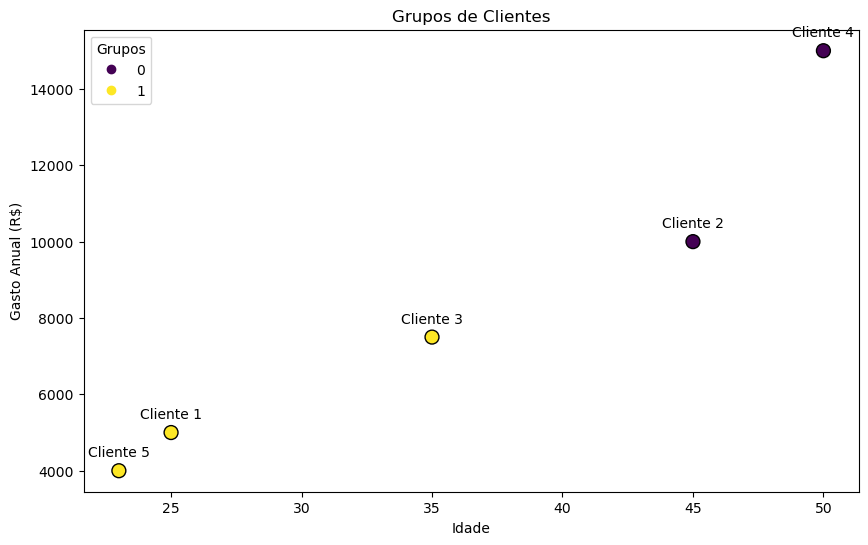

In [5]:
"""
Aprendizado não supervisionado


No aprendizado não supervisionado, os modelos são treinados em 
um conjunto de dados que não tem rótulos ou categorias pré-definidas. 

Um exemplo prático desse tipo de aprendizado é o agrupamento de clientes 
com base em suas características, sem usar nenhuma informação prévia sobre os grupos.

Vamos considerar um exemplo onde uma empresa deseja segmentar seus clientes
com base em duas características: a idade e o valor anual gasto em suas lojas.

Dados para Exemplo

    - Idade:                     [25  ,45    ,35 ,50   ,23  ]
    - Valor Anual Gasto (em R$): [5000,10000,7500,15000,4000]

Código com scikit-learn
"""

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt  # Para gráficos

# Importando a biblioteca NumPy para manipulação de arrays
import numpy as np

# Importando a classe KMeans do pacote sklearn.cluster para realizar o agrupamento
from sklearn.cluster import KMeans

# Criando um array de idades dos clientes como exemplo de dados
# O array contém idades como 25, 45, 35, 50 e 23 anos.
idades = np.array([25, 45, 35, 50, 23])

# Criando um array de gastos anuais dos clientes como exemplo de dados
# O array contém gastos anuais como 5000, 10000, 7500, 15000 e 4000 reais.
gastos_anuais = np.array([5000, 10000, 7500, 15000, 4000])

# Combinando os dois arrays em uma matriz, onde cada linha representa um cliente
# A primeira coluna contém idades e a segunda contém gastos anuais.
dados_clientes = np.column_stack((idades, gastos_anuais))

# Inicializando o modelo KMeans com 2 grupos (clusters)
# O objetivo é agrupar os dados em 2 grupos com base em suas características
modelo_kmeans = KMeans(n_clusters=2)


# Treinando o modelo KMeans com os dados dos clientes
# O modelo tentará encontrar os centros dos grupos que 
# minimizam a soma das distâncias quadradas entre os pontos e os centros dos grupos
modelo_kmeans.fit(dados_clientes)

# Obtendo os rótulos dos grupos para cada ponto de dados
# Os rótulos indicam a qual grupo cada ponto (cliente) pertence
grupos_formados = modelo_kmeans.labels_

# Criando rótulos para os pontos que serão exibidos no gráfico
# Cada ponto será rotulado como "Cliente 1", "Cliente 2", etc., com 
# base em sua posição no array original
rotulos_clientes = [f"Cliente {i+1}" for i in range(len(idades))]


# Inicializando uma nova figura para o gráfico com um tamanho específico
# O tamanho da figura será 10x6 polegadas
plt.figure(figsize=(10, 6))

# Criando um gráfico de dispersão (scatter plot) para visualizar os grupos
# - idades: são as coordenadas x dos pontos
# - gastos_anuais: são as coordenadas y dos pontos
# - c=grupos_formados: cores os pontos com base nos grupos aos quais pertencem
# - cmap='viridis': usa o mapa de cores 'viridis' para representar os diferentes grupos
# - s=100: define o tamanho dos marcadores como 100
# - edgecolors='k': define a cor da borda dos marcadores como preto ('k')
pontos_grafico = plt.scatter(idades, gastos_anuais, c=grupos_formados, cmap='viridis', s=100, edgecolors='k')

# Definindo o rótulo do eixo X como 'Idade'
plt.xlabel('Idade')

# Definindo o rótulo do eixo Y como 'Gasto Anual (R$)'
plt.ylabel('Gasto Anual (R$)')

# Definindo o título do gráfico como 'Grupos de Clientes'
plt.title('Grupos de Clientes')


# Adicionando rótulos aos pontos no gráfico
# O loop 'for' percorre cada rótulo e sua posição na lista 'rotulos_clientes'
for i, rotulo in enumerate(rotulos_clientes):
    
    # plt.annotate é usado para adicionar anotações (neste caso, rótulos) aos pontos
    # - rotulo: o texto que será exibido
    # - (idades[i], gastos_anuais[i]): as coordenadas x e y do ponto onde o rótulo será colocado
    # - textcoords="offset points": especifica que o deslocamento xytext será aplicado em pontos a partir da coordenada xy
    # - xytext=(0,10): move o rótulo 10 pontos acima da coordenada y do ponto
    # - ha='center': alinha horizontalmente o rótulo ao centro
    plt.annotate(rotulo, (idades[i], gastos_anuais[i]), textcoords="offset points", xytext=(0,10), ha='center')
    

# Adicionando legenda para os grupos
# plt.legend cria uma legenda para o gráfico
# - *pontos_grafico.legend_elements(): extrai elementos da legenda do gráfico de dispersão
# - title="Grupos": define o título da legenda como "Grupos"
legenda = plt.legend(*pontos_grafico.legend_elements(), title="Grupos")


# Exibindo o gráfico
plt.show()


"""
Neste exemplo, usamos o algoritmo K-means do scikit-learn para 
criar 2 grupos (ou clusters) de clientes. O algoritmo agrupa os clientes
de forma que a soma das distâncias quadradas entre os pontos de dados e o
centro do cluster seja minimizada.

Os clientes nos diferentes clusters podem ser direcionados para diferentes
estratégias de marketing. Por exemplo, o primeiro grupo (cluster 0) pode
ser jovens que gastam menos, e o segundo grupo (cluster 1) pode ser pessoas
mais velhas que gastam mais.

Note que este é um exemplo simplificado e, na prática, você teria um conjunto
de dados muito maior e possivelmente mais características para considerar.


- Idade:                     [25  ,45    ,35 ,50   ,23  ]
    - Valor Anual Gasto (em R$): [5000,10000,7500,15000,4000]
"""
print()



In [6]:
"""
O Aprendizado por Reforço

O Aprendizado por Reforço (Reinforcement Learning, RL) é uma 
subárea da aprendizagem de máquina que se concentra em como um
agente pode aprender a tomar decisões otimizadas em um ambiente 
para alcançar um objetivo específico. Ao contrário de outros tipos 
de aprendizado de máquina, como aprendizado supervisionado e não
supervisionado, o aprendizado por reforço não se baseia em um conjunto
de dados de treinamento etiquetado ou não etiquetado. Em vez disso, ele
se baseia na interação direta do agente com o ambiente para aprender a 
partir de suas experiências.

Componentes Básicos do Aprendizado por Reforço:

    - Agente: A entidade que aprende a partir da interação com o ambiente.
    - Ambiente: O contexto no qual o agente opera.
    - Estado (State): Uma representação do ambiente que o agente utiliza para tomar decisões.
    - Ação (Action): As operações que o agente pode executar.
    - Política (Policy): A estratégia que o agente segue para tomar 
        decisões. É uma função que mapeia estados em ações.
        
    - Recompensa (Reward): Um sinal do ambiente que informa ao agente
        quão boa foi a ação que ele tomou. O objetivo é maximizar a soma 
        total de recompensas.
        
    - Função de Valor (Value Function): Uma função que estima o valor 
        esperado de um estado, geralmente como a soma esperada de 
        recompensas futuras.
    
    Q-Valor (Q-Value): Uma função que estima a qualidade de uma ação específica 
        tomada em um estado específico.

Algoritmos Comuns:

    - Q-Learning
    - Sarsa
    - Algoritmos baseados em políticas como REINFORCE
    - Aprendizado por Aproximação de Função
    - Métodos de Ator-Crítico

Aplicações:

    - Jogos de tabuleiro e vídeo games (como Go, xadrez, e Dota 2)
    - Robótica
    - Otimização de sistemas de recomendação
    - Controle de sistemas autônomos (como veículos autônomos)
    - Finanças (otimização de portfólio)
    - Saúde (tratamentos personalizados)

O aprendizado por reforço é uma área rica e em rápido crescimento, com 
aplicações que vão desde problemas muito simples até tarefas muito 
complexas e realistas.
"""
print()

In [11]:
"""
Aprendizado por reforço

O aprendizado por reforço (Reinforcement Learning, RL) é uma
área da aprendizagem de máquina onde um agente aprende a tomar 
decisões ao interagir com um ambiente. O objetivo é encontrar uma
política que maximize algum tipo de recompensa cumulativa. 


Exercício de Aprendizado por Reforço: Resolvendo um Labirinto

Objetivo:

O objetivo deste exercício é criar um programa de aprendizado por 
reforço que resolve um labirinto 4x4. Você usará o algoritmo Q-Learning e a
biblioteca Tkinter para a interface gráfica.

Requisitos:

    - O agente deve começar no canto superior esquerdo do labirinto e o
        objetivo é chegar ao canto inferior direito.
    
    - Algumas células do labirinto são obstáculos e o agente não 
        pode passar por elas.
    
    - Use Q-Learning para treinar o agente para encontrar o caminho 
        mais eficiente para o objetivo.
    
    - Implemente uma interface gráfica usando Tkinter para visualizar 
        o labirinto e o movimento do agente.

Especificações:

    Crie uma matriz 4x4 para representar o labirinto, onde:
    
        '0' representa um espaço vazio.
        '1' representa um obstáculo.
        '2' representa a posição inicial (canto superior esquerdo).
        '3' representa a posição objetivo (canto inferior direito).       
        

    Implemente o algoritmo de Q-Learning para treinar o agente. Utilize 
    os seguintes parâmetros:
    
        - Taxa de aprendizado (alpha): 0.1
        - Fator de desconto (gamma): 0.9
        - Política de exploração (epsilon): 0.1
        - Número de episódios para treinamento: 5000

    Utilize Tkinter para criar a interface gráfica:
        - Cada célula do labirinto deve ser um quadrado de 50x50 pixels.
        - A posição inicial deve ser verde, a posição objetivo deve ser 
            vermelha e os obstáculos devem ser pretos.

    Adicione dois botões à interface:
        - "Andar": Quando clicado, o agente deve começar a se mover
            com base na política aprendida.
            
        - "Mudar Labirinto": Quando clicado, um novo labirinto deve 
            ser gerado. Certifique-se de que o novo labirinto seja solucionável.
"""

# Importa a biblioteca Tkinter e a renomeia para "tk"
# Tkinter é usada para criar interfaces gráficas.
import tkinter as tk

# Importa a biblioteca NumPy e a renomeia para "np"
# NumPy é usada para operações numéricas e manipulação de matrizes.
import numpy as np

# Importa o módulo time para manipular tempo (ex: sleep para pausas)
import time

# Importa a biblioteca random para gerar números aleatórios
import random

# Definição de Variáveis Globais
# -------------------------------------

# Variável global janela_aberta é inicializada como True.
# Isso é usado para verificar se a janela Tkinter está aberta ou fechada.
janela_aberta = True

# Variável global matriz_labirinto é inicializada como uma lista vazia.
# Esta lista será preenchida com informações sobre o labirinto.
# Cada célula pode ser 0 (caminho aberto), 1 (parede), 2 (início) ou 3 (fim).
matriz_labirinto = []

# Variável global q_tabela é inicializada como uma matriz de
# zeros com dimensões 16x4 usando NumPy.
# A tabela Q é usada em Q-learning para armazenar os 
# valores Q para cada par estado-ação.
# Temos 16 estados possíveis (uma posição para cada célula em 
# uma matriz 4x4) e 4 ações possíveis (cima, baixo, esquerda, direita).
q_tabela = np.zeros((16, 4))


# Funções Auxiliares
# ------------------------------

# Define a função fechar_janela para fechar a janela Tkinter e 
# atualizar o estado da variável janela_aberta.
def fechar_janela():
    
    # Declara que estamos usando a variável global janela_aberta.
    # Isso é necessário porque queremos alterar o valor de uma
    # variável global dentro desta função.
    global janela_aberta
    
    # Atualiza a variável janela_aberta para False.
    # Isso sinaliza que a janela Tkinter foi fechada.
    janela_aberta = False
    
    # Chama o método destroy do objeto janela_principal.
    # Isso fecha a janela Tkinter e termina o loop principal da interface gráfica.
    janela_principal.destroy()
    


# Define a função 'proximo_estado', que calcula o próximo estado 
# com base no estado e ação atuais.
def proximo_estado(estado_atual, acao_atual):

    # Utiliza a função 'divmod' para calcular o quociente e o resto da 
    # divisão de 'estado_atual' por 4.
    # O quociente é armazenado em 'linha' e o resto em 'coluna'.
    # Este passo converte um índice unidimensional 'estado_atual' em um 
    # índice bidimensional (linha, coluna).
    linha, coluna = divmod(estado_atual, 4)

    # A estrutura condicional abaixo decide o próximo estado baseado
    # na ação escolhida ('acao_atual').

    # Se a ação atual é 0 (mover para cima):
    # Atualiza a variável 'linha', subtraindo 1. Utiliza 'max' para garantir
    # que o valor não seja menor que 0.
    if acao_atual == 0:
        linha = max(linha - 1, 0)

    # Se a ação atual é 1 (mover para baixo):
    # Atualiza a variável 'linha', adicionando 1. Utiliza 'min' para garantir 
    # que o valor não seja maior que 3.
    elif acao_atual == 1:
        linha = min(linha + 1, 3)

    # Se a ação atual é 2 (mover para a esquerda):
    # Atualiza a variável 'coluna', subtraindo 1. Utiliza 'max' para
    # garantir que o valor não seja menor que 0.
    elif acao_atual == 2:
        coluna = max(coluna - 1, 0)

    # Se a ação atual é 3 (mover para a direita):
    # Atualiza a variável 'coluna', adicionando 1. Utiliza 'min' para garantir 
    # que o valor não seja maior que 3.
    elif acao_atual == 3:
        coluna = min(coluna + 1, 3)

    # Após determinar as novas coordenadas (linha, coluna), converte-as de 
    # volta para um único número.
    # Multiplica o valor da linha por 4 e adiciona o valor da coluna.
    # Isso resulta em um índice unidimensional que representa o novo estado.
    return linha * 4 + coluna



# Define a função 'labirinto_solucionavel' para verificar se o 
# labirinto gerado tem um caminho solucionável do início ao fim.
def labirinto_solucionavel():

    # Inicializa um conjunto 'visitados' para manter um registro de todas
    # as células já visitadas no labirinto.
    visitados = set()

    # Inicializa uma pilha 'pilha' e coloca a posição inicial (0,0) 
    # como primeiro elemento.
    pilha = [(0, 0)]

    # Enquanto a pilha não estiver vazia, continua a busca.
    while pilha:

        # Desempilha a posição atual (linha, coluna) do topo da pilha.
        (linha, coluna) = pilha.pop()
        
        # Verifica se a posição atual é o destino (3,3). Se for, retorna True.
        if (linha, coluna) == (3, 3):
            return True
        
        # Varre as direções possíveis: 
        # cima (-1, 0), 
        # baixo (1, 0), 
        # esquerda (0, -1) e 
        # direita (0, 1).
        for (dlinha, dcoluna) in [(-1, 0), (1, 0), (0, -1), (0, 1)]:

            # Calcula a nova posição somando as coordenadas atuais 
            # com as direções possíveis.
            nova_linha, nova_coluna = linha + dlinha, coluna + dcoluna
            
            # Verifica se a nova posição está dentro dos limites do tabuleiro.
            if 0 <= nova_linha < 4 and 0 <= nova_coluna < 4:
                
                # Verifica se a nova célula não é uma parede (valor 1) e 
                # ainda não foi visitada.
                if matriz_labirinto[nova_linha][nova_coluna] != 1 and (nova_linha, nova_coluna) not in visitados:
                    
                    # Adiciona a nova posição à pilha.
                    pilha.append((nova_linha, nova_coluna))

                    # Marca a nova posição como visitada, adicionando-a
                    # ao conjunto 'visitados'.
                    visitados.add((nova_linha, nova_coluna))

    # Se o loop terminar e a função ainda não tiver retornado True, 
    # então o labirinto não é solucionável.
    return False
        
    
# Define a função 'mudar_labirinto' que gera um novo labirinto, 
# desenha ele na interface e treina o modelo de Q-learning.
def mudar_labirinto():

    # Utiliza a palavra-chave 'global' para indicar que a função vai 
    # modificar a variável global 'matriz_labirinto'.
    global matriz_labirinto

    # Entra em um loop infinito até encontrar um labirinto solucionável.
    while True:

        # Chama a função 'criar_labirinto' para gerar uma nova 
        # matriz de labirinto.
        criar_labirinto()

        # Chama a função 'labirinto_solucionavel' para verificar se o 
        # labirinto atual tem uma solução.
        # Se o labirinto for solucionável, sai do loop.
        if labirinto_solucionavel():
            break
            
    
    # Limpa todos os desenhos anteriores do painel.
    painel.delete("all")
    
    
    # Chama a função 'desenhar_labirinto' para desenhar o novo
    # labirinto na interface gráfica.
    desenhar_labirinto()

    # Chama a função 'treinar_modelo' para treinar o modelo de 
    # Q-learning com base no novo labirinto.
    treinar_modelo()

    
# Define a função 'criar_labirinto' responsável por inicializar
# e preencher a matriz do labirinto.
def criar_labirinto():

    # Utiliza a palavra-chave 'global' para indicar que a função vai 
    # modificar a variável global 'matriz_labirinto'.
    global matriz_labirinto

    # Cria uma matriz 4x4 preenchida com zeros. 
    # Um zero indica uma célula vazia na matriz do labirinto.
    matriz_labirinto = [[0 for _ in range(4)] for _ in range(4)]
    
    
    # Define a célula de partida (canto superior esquerdo) como sendo do tipo 2.
    # O número 2 serve como um marcador para indicar o ponto de partida do agente.
    matriz_labirinto[0][0] = 2
    
    
    # Define a célula de destino (canto inferior direito) como sendo do tipo 3.
    # O número 3 serve como um marcador para indicar o ponto de chegada do agente.
    matriz_labirinto[3][3] = 3
    
    # Inicia um loop que será executado 5 vezes para colocar obstáculos no labirinto.
    for _ in range(5):

        # Gera coordenadas aleatórias para a linha e a coluna dentro 
        # dos limites da matriz 4x4.
        linha, coluna = random.randint(0, 3), random.randint(0, 3)
    
        # Verifica se a célula escolhida aleatoriamente está 
        # vazia (ou seja, contém um zero).
        if matriz_labirinto[linha][coluna] == 0:

            # Se a célula está vazia, ela se torna um obstáculo, 
            # marcado com o número 1.
            matriz_labirinto[linha][coluna] = 1
            
            
# Define a função 'treinar_modelo' responsável por treinar 
# o agente usando o algoritmo de Q-Learning.
def treinar_modelo():

    # Declara que a função modificará as variáveis 
    # globais 'q_tabela' e 'matriz_labirinto'.
    global q_tabela, matriz_labirinto

    # Define o valor de alpha, o fator de aprendizado, como 0.1.
    alpha = 0.1

    # Define o valor de gamma, o fator de desconto, como 0.9.
    gamma = 0.9

    # Define o valor de epsilon, utilizado para a estratégia epsilon-greedy, como 0.1.
    epsilon = 0.1

    # Define o número total de episódios para treinar o modelo como 5000.
    num_episodios = 5000

    # Inicializa a Q-tabela com zeros. A tabela tem 16 estados
    # (para as 16 células) e 4 ações (cima, baixo, esquerda, direita).
    q_tabela = np.zeros((16, 4))
    
    # Inicia o loop de treinamento para um número específico de episódios.
    for episodio in range(num_episodios):

        # Define o estado inicial como 0, que representa a célula 
        # inicial (0,0) no labirinto.
        estado = 0

        # O loop continua até que o estado atinja 15, que é o estado 
        # objetivo (3,3) no labirinto.
        while estado != 15:

            # Implementa a estratégia epsilon-greedy para escolher uma ação.
            if np.random.rand() < epsilon:
                
                # Escolhe uma ação aleatória.
                acao = np.random.choice(4)
                
            else:
                
                # Escolhe a melhor ação com base na Q-tabela atual.
                acao = np.argmax(q_tabela[estado])

            # Obtém o próximo estado com base no estado atual e na ação escolhida.
            estado_seguinte = proximo_estado(estado, acao)
            
            
            
            """
            estado_seguinte // 4 e estado_seguinte % 4: Aqui, estamos transformando o
                estado unidimensional estado_seguinte em duas coordenadas bidimensionais
                que correspondem à localização na matriz do labirinto. O operador // é a 
                divisão inteira, e % é o operador módulo.
            
                    Exemplo: se estado_seguinte = 5, então estado_seguinte // 4 = 1 e 
                    estado_seguinte % 4 = 1, o que corresponderia à localização (1,1) na 
                    matriz do labirinto.

            matriz_labirinto[estado_seguinte // 4][estado_seguinte % 4]: Esta expressão 
                obtém o valor na matriz do labirinto correspondente ao próximo estado. O valor 
                poderia ser 0 (caminho aberto), 1 (obstáculo), 2 (estado inicial), 
                ou 3 (estado final).

            matriz_labirinto[estado_seguinte // 4][estado_seguinte % 4] == 1: Estamos 
                verificando se o valor na posição do próximo estado na matriz do labirinto 
                é 1, o que significaria que há um obstáculo nesse estado.

            recompensa = -100 if ... else 0: Finalmente, a variável recompensa é 
                definida com base nesta condição. Se a posição do próximo estado contém
                um obstáculo (valor 1), a recompensa é definida como -100. Caso contrário, 
                ela é definida como 0.

            Em resumo, essa linha de código é responsável por calcular a recompensa 
                para uma transição de estado específica, penalizando fortemente o agente 
                se ele se mover para uma célula contendo um obstáculo.
            """
            # Calcula a recompensa. Se o próximo estado contém um
            # obstáculo, a recompensa é -100.
            recompensa = -100 if matriz_labirinto[estado_seguinte // 4][estado_seguinte % 4] == 1 else 0
            
            
            # Se o próximo estado é o estado objetivo, a recompensa é 100.
            if estado_seguinte == 15:
                recompensa = 100
                
            
            """
            é a atualização da Q-tabela usando a equação Q-Learning.
            
            q_tabela[estado, acao]: Esta é a entrada na Q-tabela para o estado 
                atual e a ação atual. Ela contém o valor Q aprendido até agora para 
                esta combinação de estado-ação.

            alpha: Esta é a taxa de aprendizagem. Ela define até que ponto o 
                novo valor Q calculado substitui o valor Q anterior. Se alpha = 1, o 
                valor aprendido substitui completamente o antigo. Se alpha = 0, o 
                valor aprendido não é incorporado de forma alguma. Tipicamente, você 
                quer um valor entre 0 e 1.

            recompensa: Esta é a recompensa obtida ao tomar a ação acao no estado
                e chegar ao estado_seguinte.

            gamma: Este é o fator de desconto, que pondera quão importante são as 
                recompensas futuras em relação às atuais. Se gamma = 0, o agente é 
                totalmente "miópe" e só se preocupa com recompensas imediatas. Se 
                gamma = 1, o agente valoriza todas as recompensas futuras tanto 
                quanto as atuais.

            np.max(q_tabela[estado_seguinte]): Este termo pega o maior valor Q possível 
                para o próximo estado (estado_seguinte) considerando todas as ações 
                possíveis. Isso é parte do aprendizado: estamos sempre procurando o 
                "melhor futuro" possível a partir do próximo estado.

            (1 - alpha) * q_tabela[estado, acao] + alpha * (recompensa + gamma * np.max(q_tabela[estado_seguinte])): Esta é a 
                equação Q-Learning em si. Ela atualiza o valor Q para a combinação atual 
                de estado e ação com base na recompensa recebida e na melhor estimativa 
                futura (parte gamma * np.max(q_tabela[estado_seguinte])).

            A ideia da equação é misturar o valor Q atual e o novo valor Q de tal
                forma que o resultado reflete mais precisamente o valor "real" da
                ação no estado dado. O valor "real" é uma combinação da recompensa 
                imediata e da melhor recompensa futura que se pode obter a partir do
                próximo estado. Isso é feito ponderando a contribuição do valor Q atual 
                e o valor Q recém-calculado usando a taxa de aprendizagem alpha.
            """
            # Atualiza a Q-tabela usando a fórmula Q-Learning.
            q_tabela[estado, acao] = (1 - alpha) * q_tabela[estado, acao] + alpha * (recompensa + gamma * np.max(q_tabela[estado_seguinte]))

            # Atualiza o estado atual para o próximo estado.
            estado = estado_seguinte
            
    
    
# Definindo a função 'mover_agente', cuja responsabilidade é mover 
# o agente através do labirinto.
def mover_agente():
    
    # Utilizando as variáveis globais que vão ser usadas nessa função.
    # 'janela_aberta' indica se a janela do Tkinter ainda está aberta.
    # 'matriz_labirinto' contém a estrutura atual do labirinto.
    # 'q_tabela' contém os valores Q aprendidos durante o treinamento.
    global janela_aberta, matriz_labirinto, q_tabela
    
    # Inicializando a variável 'estado' como 0, o que geralmente 
    # representa o ponto de partida no labirinto.
    estado = 0
    
    # O loop 'while' continua executando até que o agente alcance o estado final 15.
    while estado != 15:
        
        # Verificando se a janela da interface gráfica ainda está aberta.
        # Se a janela foi fechada, a função 'return' é chamada para sair da função.
        if not janela_aberta:
            return
        
        
        # A variável 'acao' é determinada pegando a ação que tem o 
        # maior valor Q para o estado atual.
        # Isso é feito buscando o índice do maior valor na linha da 
        # 'q_tabela' correspondente ao 'estado' atual.
        acao = np.argmax(q_tabela[estado])
        
        # A função 'proximo_estado' é chamada para calcular qual será 
        # o próximo estado com base no estado atual e a ação escolhida.
        estado_seguinte = proximo_estado(estado, acao)
        
        # Converte o estado em uma forma unidimensional (estado_seguinte) para
        # coordenadas bidimensionais (linha, coluna).
        linha, coluna = divmod(estado_seguinte, 4)
        
        
        """
        é responsável por desenhar um círculo (oval) azul no canvas, representando a
            posição atual do agente no labirinto.

        painel.create_oval: Este método é chamado no objeto painel, que é 
            um Canvas Tkinter. O método create_oval desenha um oval (que neste caso é 
            um círculo, pois a altura e a largura são iguais) no Canvas.

        coluna * 50 + 10, linha * 50 + 10, coluna * 50 + 40, linha * 50 + 40: Estas 
            são as coordenadas que definem a caixa delimitadora dentro da qual o oval 
            será desenhado. A caixa começa no ponto (coluna * 50 + 10, linha * 50 + 10) e 
            termina em (coluna * 50 + 40, linha * 50 + 40). Aqui, linha e coluna são as
            posições do agente no labirinto. Os números adicionados (+ 10 e + 40) centralizam
            o oval dentro da célula do labirinto, que é um retângulo de 50x50 pixels.

        fill='blue': Este parâmetro define que o círculo será preenchido com a cor azul.

        tags='agente': Este parâmetro permite associar uma tag ao oval. Isso é útil se 
            você quiser fazer alguma operação em todos os objetos que compartilham essa 
            tag mais tarde, como excluí-los ou movê-los.

        Então, resumindo, esta linha de código desenha um círculo azul que representa 
            o agente no labirinto. O círculo é posicionado na célula atual do agente e 
            é desenhado de forma a ser centralizado dentro dessa célula.
        """
        # Desenhando o agente (um círculo azul) na posição calculada no painel Tkinter.
        # A posição é calculada multiplicando as coordenadas de linha e coluna 
        # por 50 e ajustando para caber dentro do quadro.
        painel.create_oval(coluna * 50 + 10, linha * 50 + 10, coluna * 50 + 40, linha * 50 + 40, fill='blue', tags='agente')
        
        # O método 'update' é chamado para garantir que o painel Tkinter
        # mostre as atualizações gráficas (neste caso, o movimento do agente).
        painel.update()
        
        # A função 'time.sleep(1)' pausa o programa por 1 segundo para 
        # que o usuário possa ver o agente se mover.
        time.sleep(1)
        
        # O método 'delete' remove o círculo azul anterior, para que um 
        # novo possa ser desenhado na próxima iteração do loop.
        painel.delete('agente')
        
        # Atualizando o estado atual para ser o 'estado_seguinte', permitindo que 
        # o agente continue se movendo no próximo ciclo do loop.
        estado = estado_seguinte
        
        
    
    
# Define a função 'desenhar_labirinto' responsável por desenhar 
# o labirinto no painel Tkinter.
def desenhar_labirinto():
    
    # Acessa a variável global 'matriz_labirinto' que contém a 
    # estrutura atual do labirinto.
    global matriz_labirinto
    
    # Percorre cada linha do labirinto, indexada por 'i'.
    for i in range(4):
        
        # Percorre cada coluna do labirinto na linha atual, indexada por 'j'.
        for j in range(4):
            
            # Inicialmente, define a cor do quadrado como 'black' se o 
            # valor na 'matriz_labirinto' for 1 (representando uma parede)
            # e 'white' se for 0 (representando um espaço aberto).
            cor = 'black' if matriz_labirinto[i][j] == 1 else 'white'
            
            # Se o valor na 'matriz_labirinto' for 2, isso representa o ponto de partida. 
            # Portanto, define a cor do quadrado como 'green'.
            if matriz_labirinto[i][j] == 2:
                cor = 'green'
            
            # Se o valor na 'matriz_labirinto' for 3, isso representa o ponto de chegada.
            # Portanto, define a cor do quadrado como 'red'.
            elif matriz_labirinto[i][j] == 3:
                cor = 'red'
                
            
            """
            é responsável por desenhar um único retângulo na tela, que é 
                uma célula do labirinto.

            painel.create_rectangle: Este método é chamado no objeto painel, 
                que é um Canvas Tkinter. O método create_rectangle desenha um 
                retângulo no Canvas.

            j * 50, i * 50, j * 50 + 50, i * 50 + 50: Estas são as coordenadas 
                que definem o retângulo. O retângulo começa na 
                coordenada (j * 50, i * 50) e termina na 
                coordenada (j * 50 + 50, i * 50 + 50). Essas coordenadas 
                são multiplicadas por 50 para escalonar o tamanho do retângulo, 
                tornando-o grande o suficiente para ser visto facilmente. 
                Aqui, i e j são índices da matriz matriz_labirinto que 
                representam as linhas e colunas do labirinto, respectivamente.

            fill=cor: O parâmetro fill define a cor de preenchimento do 
                retângulo. A variável cor é definida anteriormente na função, 
                com base no valor da célula do labirinto representada por 
                matriz_labirinto[i][j]. A cor pode ser preta (para um obstáculo), 
                branca (para um espaço vazio), verde (para a célula de início), ou 
                vermelha (para a célula de destino).

            Então, resumindo, essa linha de código desenha um retângulo (uma célula 
            do labirinto) no Canvas Tkinter, preenchendo-o com a cor adequada. Isso é
            feito para cada célula do labirinto, criando assim a representação gráfica
            completa do labirinto na GUI.
            """
            
            # Usa a função 'create_rectangle' do Tkinter para desenhar
            # um retângulo (quadrado, neste caso) no painel.
            # As coordenadas do quadrado são calculadas com base nos índices 'i' e 'j'.
            # O 'fill=cor' preenche o quadrado com a cor determinada.
            painel.create_rectangle(j * 50, i * 50, j * 50 + 50, i * 50 + 50, fill=cor)
    

    
# Inicializa a janela Tkinter e a armazena na 
# variável 'janela_principal'.
janela_principal = tk.Tk()

# Define o título da janela como "Labirinto com Q-Learning".
janela_principal.title("Labirinto com Q-Learning")

# Cria um objeto Canvas (painel) Tkinter, onde o labirinto
# e outros elementos serão desenhados.
# Define sua largura e altura como 200x200 pixels.
painel = tk.Canvas(janela_principal, width=200, height=200)

# Empacota o Canvas na janela principal para que ele seja exibido.
painel.pack()

# Chama a função 'mudar_labirinto()' para criar e
# exibir o labirinto inicial.
mudar_labirinto()

# Cria um botão com o rótulo "Andar" e associa a função 'mover_agente()' a ele.
# Quando o botão for clicado, a função 'mover_agente()' será chamada.
botao_andar = tk.Button(janela_principal, 
                        text="Andar", 
                        command=mover_agente)

# Empacota o botão 'botao_andar' para que ele 
# seja exibido na janela principal.
botao_andar.pack()

# Cria um botão com o rótulo "Mudar Labirinto" e 
# associa a função 'mudar_labirinto()' a ele.
# Quando o botão for clicado, a função 'mudar_labirinto()' será chamada.
botao_mudar_labirinto = tk.Button(janela_principal, 
                                  text="Mudar Labirinto", 
                                  command=mudar_labirinto)

# Empacota o botão 'botao_mudar_labirinto' para que ele 
# seja exibido na janela principal.
botao_mudar_labirinto.pack()

# Define um protocolo para o evento de fechamento da janela.
# Quando a janela for fechada, a função 'fechar_janela()' será chamada.
janela_principal.protocol("WM_DELETE_WINDOW", fechar_janela)



# Entra no loop principal da Tkinter para manter a
# janela aberta e responsiva.
janela_principal.mainloop()
